# 이승원

- 변경 사항 : Encoded된 데이터셋으로 시각화, 산점도
    - Encoded된 데이터셋으로 시각화 : 기존의 시각화와 동일
    - 산점도 : 3개월 단위 생존기간과 다른 컬럼 간의 비교 -> 유의미한 그래프는 없는 것 같다. 

### 초기 설정(지완님꺼 가져옴)

In [1]:
# 데이터 분석 및 시각화에 필요한 라이브러리들을 가져옵니다.
# pathlib: 파일 경로를 쉽게 다루기 위한 라이브러리
from pathlib import Path
# display: Jupyter Notebook에서 데이터프레임 등을 예쁘게 출력하기 위해 사용
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.ticker as mstick
import pandas as pd
import seaborn as sns

# seaborn의 기본 테마를 설정합니다. 'whitegrid' 스타일과 'crest' 색상 팔레트를 사용합니다.
sns.set_theme(style="whitegrid", palette="crest")

# 시각화에서 한글이 깨지지 않도록 나눔고딕 폰트를 설정합니다.
# 시스템에 폰트가 설치되어 있지 않으면 오류가 발생할 수 있어 try-except 구문으로 감쌌습니다.
try:
    plt.rc('font', family='NanumGothic')
except Exception:
    pass
# 마이너스 부호가 깨지는 것을 방지하는 설정입니다.
plt.rc('axes', unicode_minus=False)


# 데이터셋 병합
DATA_PATH1 = Path('../data/2022Data_part1.csv')
DATA_PATH2 = Path('../data/2022Data_part2.csv')
df_part1 = pd.read_csv(DATA_PATH1)
df_part2 = pd.read_csv(DATA_PATH2)

# DeepSurv 분석용 샘플 데이터를 불러오고 기본 전처리를 수행합니다.
df = pd.concat([df_part1, df_part2], ignore_index=True).rename(columns=lambda col: col.strip())


C:\Users\vhqhr\AppData\Local\Temp\ipykernel_9056\657887825.py:27: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df_part1 = pd.read_csv(DATA_PATH1)


### Encoded된 데이터셋으로 시각화

In [2]:
DATA_PATH3 = Path('../data/encoded_dataset.csv')
 
encoded_df = pd.read_csv(DATA_PATH3) 

In [3]:
encoded_df

,Patient ID,Age recode with <1 year olds and 90+,Sex,Year of diagnosis,Year of follow-up recode,"Race recode (W, B, AI, API)",Site recode ICD-O-3/WHO 2008,Primary Site,Primary Site - labeled,Derived Summary Grade 2018 (2018+),...,RX Summ--Surg Oth Reg/Dis (2003+),Sequence number,Median household income inflation adj to 2023,Number of Cores Positive Recode (2010+),Number of Cores Examined Recode (2010+),EOD Primary Tumor Recode (2018+),PRCDA 2020,Survival months,target_label,Survival months_bin_3m
0,671,14,1,18,0,4,10,341,22,2,...,6,7,2,0,0,10,0,59,-1,19
1,812,14,0,22,0,4,18,163,3,12,...,6,17,2,0,0,3,0,7,-1,2
2,878,13,1,4,0,4,0,181,10,8,...,6,7,0,0,0,22,0,218,-1,72
3,1018,15,0,11,0,4,1,182,11,8,...,6,10,1,0,0,22,0,134,-1,44
4,1269,9,0,7,0,4,16,187,16,8,...,6,17,1,0,0,22,0,187,-1,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525704,63452555,16,0,22,0,4,10,349,26,5,...,6,17,6,0,0,21,0,2,0,0
525705,63452558,15,1,22,0,2,10,349,26,5,...,6,17,5,0,0,21,0,2,0,0
525706,63452564,16,1,22,0,4,8,189,18,5,...,6,17,11,0,0,21,0,2,0,0
525707,63452565,19,0,22,0,4,8,189,18,5,...,6,17,13,0,0,21,0,0,0,0


In [4]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525709 entries, 0 to 525708
Data columns (total 25 columns):
 #   Column                                                       Non-Null Count   Dtype
---  ------                                                       --------------   -----
 0   Patient ID                                                   525709 non-null  int64
 1   Age recode with <1 year olds and 90+                         525709 non-null  int64
 2   Sex                                                          525709 non-null  int64
 3   Year of diagnosis                                            525709 non-null  int64
 4   Year of follow-up recode                                     525709 non-null  int64
 5   Race recode (W, B, AI, API)                                  525709 non-null  int64
 6   Site recode ICD-O-3/WHO 2008                                 525709 non-null  int64
 7   Primary Site                                                 525709 non-null  int64

In [144]:
# 딕셔너리로 인코딩하기 전 값 저장

import numpy as np

column_mapping = {
    '성별': 'Sex',
    '인종': 'Race recode (W, B, AI, API)',
    '나이': 'Age recode with <1 year olds and 90+',
    '진단 연도': 'Year of diagnosis',
    '암 부위': 'Site recode ICD-O-3/WHO 2008'
}

is_duplicated = df.duplicated(subset=['Patient ID'], keep=False)
unique_patients_df = df[~is_duplicated]
is_duplicated2 = encoded_df.duplicated(subset=['Patient ID'], keep=False)
unique_patients_df2 = encoded_df[~is_duplicated2]

unique_ids_from_df = set(unique_patients_df['Patient ID'])
unique_ids_from_encoded = set(unique_patients_df2['Patient ID'])

common_unique_ids = unique_ids_from_df.intersection(unique_ids_from_encoded)

encoding_mapping_dict = [{},{},{},{},{}]
common_list = list(common_unique_ids)
encoded_new = encoded_df[encoded_df['Patient ID'].isin(common_list)]


df_columns = column_mapping.values()
for idx, col in enumerate(df_columns):
    unique_value = encoded_df[col].unique()
    for uni in unique_value:
        first_row_unique = encoded_new[encoded_new[col] == uni].iloc[0]
        id = first_row_unique['Patient ID']
        key = int(first_row_unique[col])
        value = df[df['Patient ID'] == id][col].values[0]
        # print('key:',key,'value:', value)
        if type(value) == np.int64:
            encoding_mapping_dict[idx][key] = int(value)
        else:
            encoding_mapping_dict[idx][key] = value
    print(encoding_mapping_dict[idx])   

encoding_mapping_dict

{1: 'Male', 0: 'Female'}
{4: 'White', 1: 'Asian or Pacific Islander', 2: 'Black', 0: 'American Indian/Alaska Native', 3: 'Unknown'}
{14: '65-69 years', 13: '60-64 years', 15: '70-74 years', 9: '40-44 years', 10: '45-49 years', 18: '85-89 years', 12: '55-59 years', 16: '75-79 years', 7: '30-34 years', 17: '80-84 years', 11: '50-54 years', 19: '90+ years', 8: '35-39 years', 5: '20-24 years', 1: '01-04 years', 3: '10-14 years', 4: '15-19 years', 6: '25-29 years', 0: '00 years', 2: '05-09 years'}
{18: 2018, 22: 2022, 4: 2004, 11: 2011, 7: 2007, 20: 2020, 19: 2019, 21: 2021, 16: 2016, 10: 2010, 15: 2015, 3: 2003, 12: 2012, 5: 2005, 13: 2013, 17: 2017, 2: 2002, 9: 2009, 6: 2006, 14: 2014, 0: 2000, 1: 2001, 8: 2008}
{10: 'Lung and Bronchus', 18: 'Stomach', 0: 'Appendix', 1: 'Ascending Colon', 16: 'Sigmoid Colon', 6: 'Intrahepatic Bile Duct', 19: 'Transverse Colon', 17: 'Splenic Flexure', 3: 'Descending Colon', 9: 'Liver', 2: 'Cecum', 8: 'Large Intestine, NOS', 4: 'Hepatic Flexure', 14: 'NHL -

[{1: 'Male', 0: 'Female'},
 {4: 'White',
  1: 'Asian or Pacific Islander',
  2: 'Black',
  0: 'American Indian/Alaska Native',
  3: 'Unknown'},
 {14: '65-69 years',
  13: '60-64 years',
  15: '70-74 years',
  9: '40-44 years',
  10: '45-49 years',
  18: '85-89 years',
  12: '55-59 years',
  16: '75-79 years',
  7: '30-34 years',
  17: '80-84 years',
  11: '50-54 years',
  19: '90+ years',
  8: '35-39 years',
  5: '20-24 years',
  1: '01-04 years',
  3: '10-14 years',
  4: '15-19 years',
  6: '25-29 years',
  0: '00 years',
  2: '05-09 years'},
 {18: 2018,
  22: 2022,
  4: 2004,
  11: 2011,
  7: 2007,
  20: 2020,
  19: 2019,
  21: 2021,
  16: 2016,
  10: 2010,
  15: 2015,
  3: 2003,
  12: 2012,
  5: 2005,
  13: 2013,
  17: 2017,
  2: 2002,
  9: 2009,
  6: 2006,
  14: 2014,
  0: 2000,
  1: 2001,
  8: 2008},
 {10: 'Lung and Bronchus',
  18: 'Stomach',
  0: 'Appendix',
  1: 'Ascending Colon',
  16: 'Sigmoid Colon',
  6: 'Intrahepatic Bile Duct',
  19: 'Transverse Colon',
  17: 'Splenic Fle

In [167]:
# 한글 폰트 및 마이너스 부호 설정
import matplotlib.font_manager as fm 
import matplotlib
font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)
plt.rc('axes', unicode_minus=False)

def visualization_data(kor_name, eng_name, dict_idx):
    if eng_name in encoded_df.columns:
        plt.figure(figsize=(12, 8))
        # 컬럼별 빈도수 (비율) 계산
        # normalize=True로 설정하여 전체에서 차지하는 비율을 계산합니다.
        value_counts_ratio = encoded_df[eng_name].value_counts(normalize=True) * 100
        print(value_counts_ratio)
        # 정렬 방식 결정
        if kor_name == '암 부위':
            # '암 부위'는 종류가 많으므로, 발생 비율이 높은 상위 10개만 선택합니다.
            data_to_plot = value_counts_ratio.nlargest(10)
            title = f'{kor_name} 분포 (상위 10개)'
            # 상위 10개는 비율이 높은 순서 그대로 정렬합니다.
            order_for_plot = data_to_plot.index
        
        else:
            title = f'{kor_name} 분포'
            data_to_plot = value_counts_ratio
            order_for_plot = data_to_plot.index

        # --- 시각화 (Seaborn 바 그래프) ---
        
        # Bar Plot 그리기: x축(항목 이름), y축(비율), order(정렬 순서) 지정
        # hue와 x를 동일하게 지정하면 막대마다 색이 다르게 나옵니다.
        data_to_plot_decoding = []
        for i in range(len(data_to_plot.index)):
            data_to_plot_decoding.append(encoding_mapping_dict[dict_idx][int(data_to_plot.index[i])])
        if kor_name == '나이' or kor_name == '진단 연도':
            # 나이와 진단 연도는 크기순 정렬이 아닌 인덱스 순서별 정렬
            indices = data_to_plot.index.argsort()
            ax = sns.barplot(
                x=sorted(data_to_plot.index), 
                y=data_to_plot.values[indices], 
                hue=sorted(data_to_plot.index), 
                order=order_for_plot[indices], 
                palette='viridis', 
                legend=False
            )
        else:
            ax = sns.barplot(
                x=data_to_plot.index, 
                y=data_to_plot.values, 
                hue=data_to_plot.values.argsort(), 
                order=order_for_plot, 
                palette='viridis', 
                legend=False
            )
            ax.set_xticks(range(len(data_to_plot_decoding)), labels=data_to_plot_decoding, rotation=45, ha='right')


        
        # --- 그래프 디자인 ---
        plt.title(title, fontsize=18, pad=20)
        plt.xlabel(kor_name, fontsize=12)
        plt.ylabel('비율 (%)', fontsize=12)

        
        # 막대 위에 비율(%) 텍스트 표시
        for p in ax.patches:
            height = p.get_height()
            # 텍스트 위치 계산 및 소수점 첫째 자리까지 표시
            ax.text(
                p.get_x() + p.get_width() / 2., 
                height, 
                f'{height:.1f}%', 
                ha="center", 
                va='bottom', 
                fontsize=10
            )

        plt.tight_layout() # 그래프 영역이 잘리지 않도록 레이아웃 최적화
        plt.show() # 루프 안에서 그래프를 명시적으로 표시

    else:
        print(f"경고: '{eng_name}' 컬럼을 데이터프레임에서 찾을 수 없습니다.")

Sex
0    50.771054
1    49.228946
Name: proportion, dtype: float64


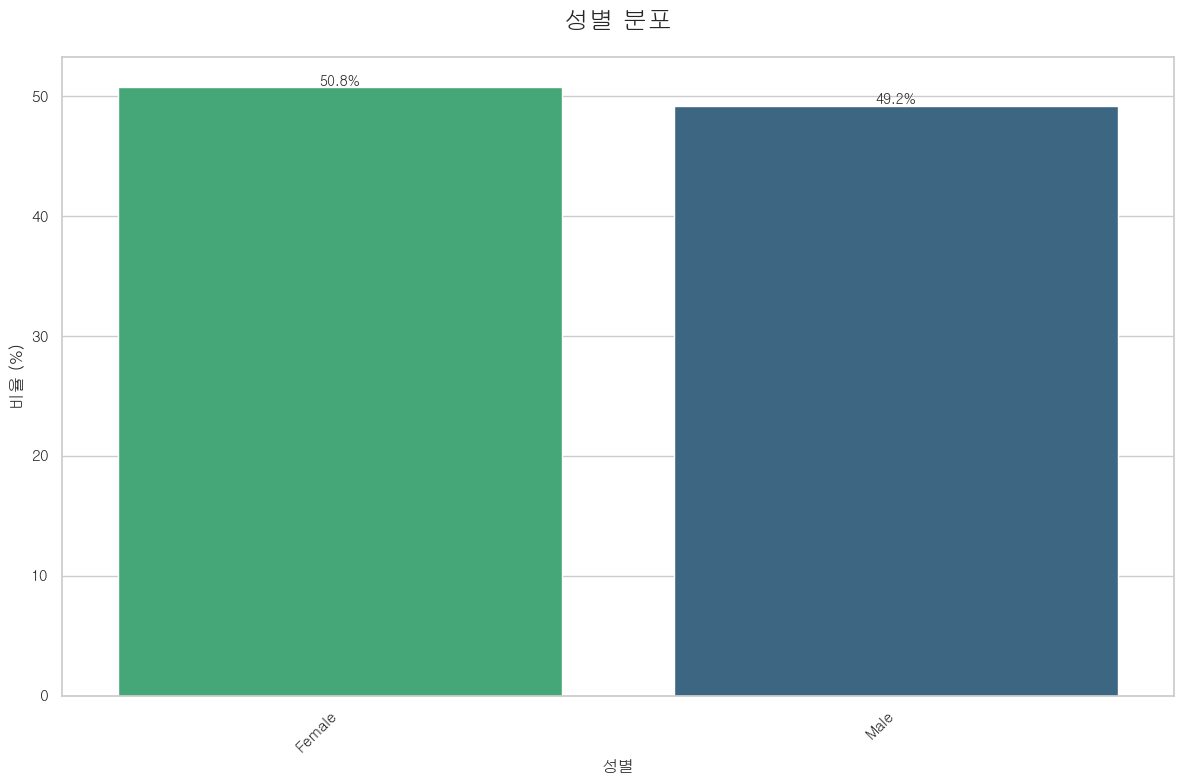

Race recode (W, B, AI, API)
4    77.413170
2    10.968806
1     9.957981
3     0.860362
0     0.799682
Name: proportion, dtype: float64


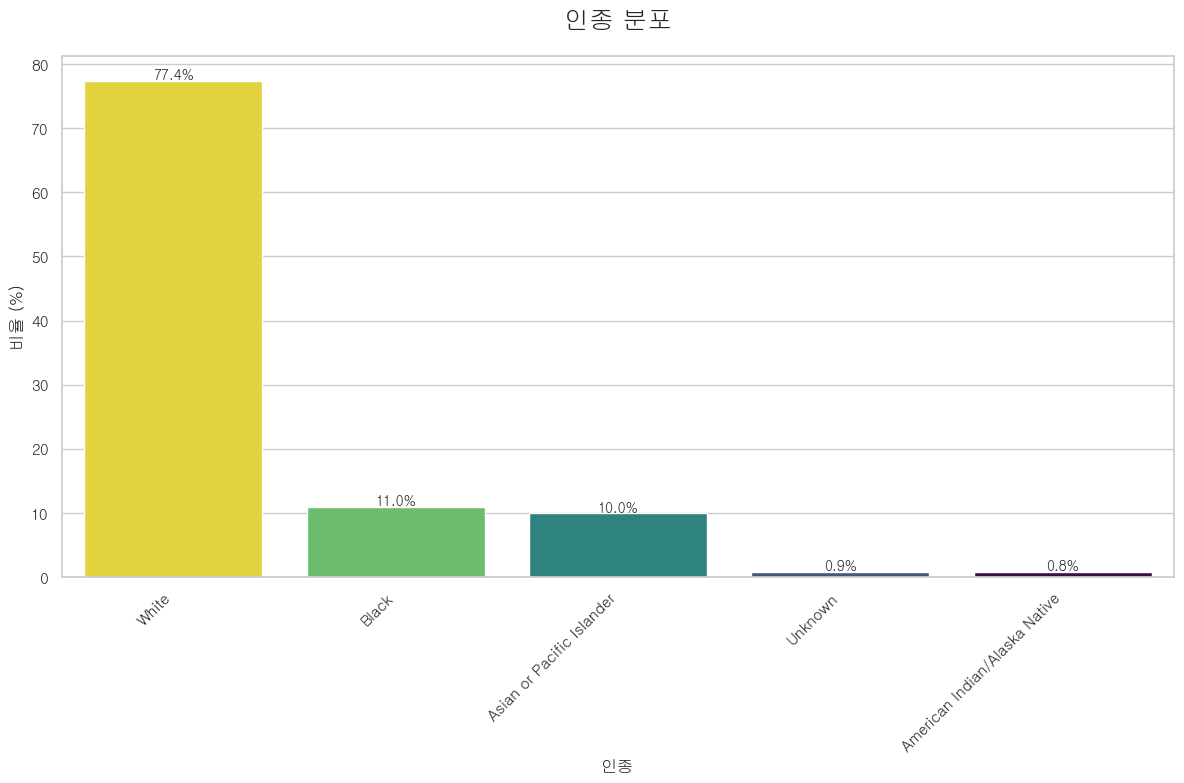

Age recode with <1 year olds and 90+
14    16.721989
15    15.081918
13    14.577076
12    11.354761
16    11.331935
11     8.675522
17     6.911618
10     4.631840
18     3.321229
9      2.610760
8      1.447379
19     1.227485
7      0.848759
6      0.483157
5      0.284758
4      0.202393
3      0.102528
1      0.096822
0      0.045843
2      0.042229
Name: proportion, dtype: float64


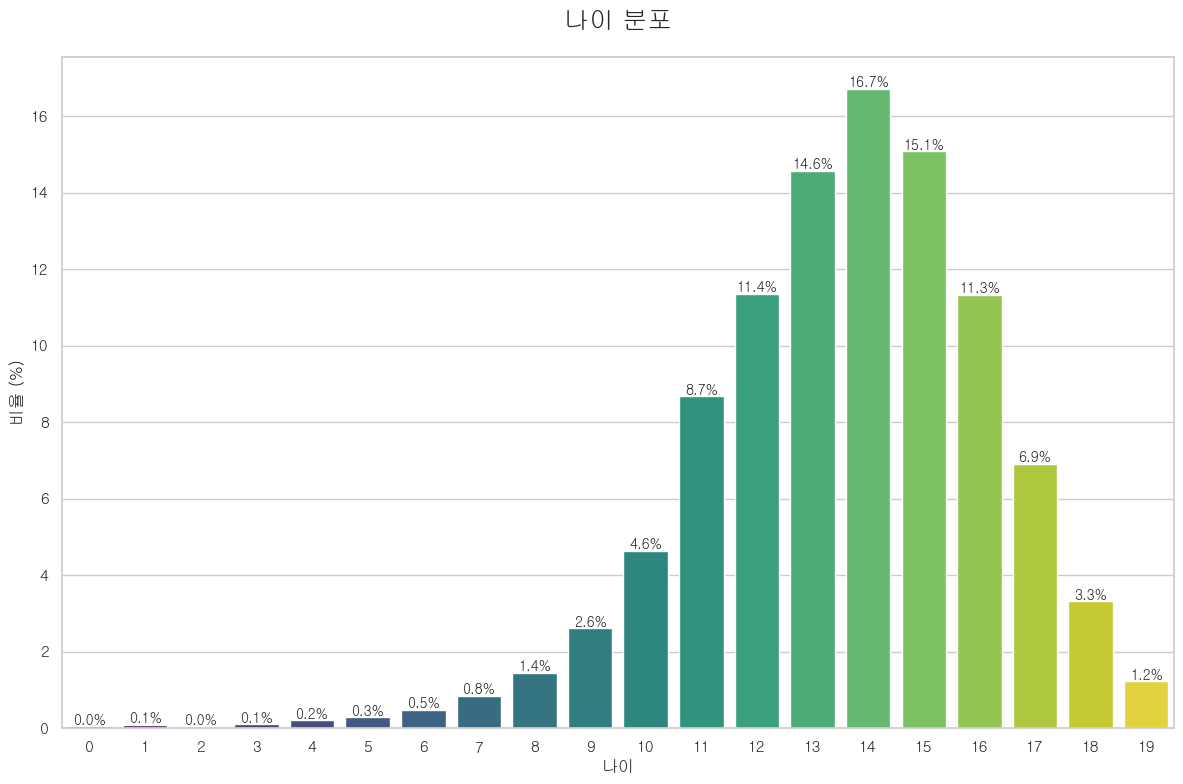

Year of diagnosis
22    17.086829
21    12.812982
20     8.394758
19     7.913123
18     6.624007
17     5.769351
16     5.051083
15     4.464257
14     3.924224
13     3.401502
12     3.110846
11     2.801169
10     2.593070
9      2.416926
8      2.217767
7      2.017656
6      1.836948
5      1.643305
4      1.451754
3      1.301100
2      1.175555
1      1.050962
0      0.940825
Name: proportion, dtype: float64


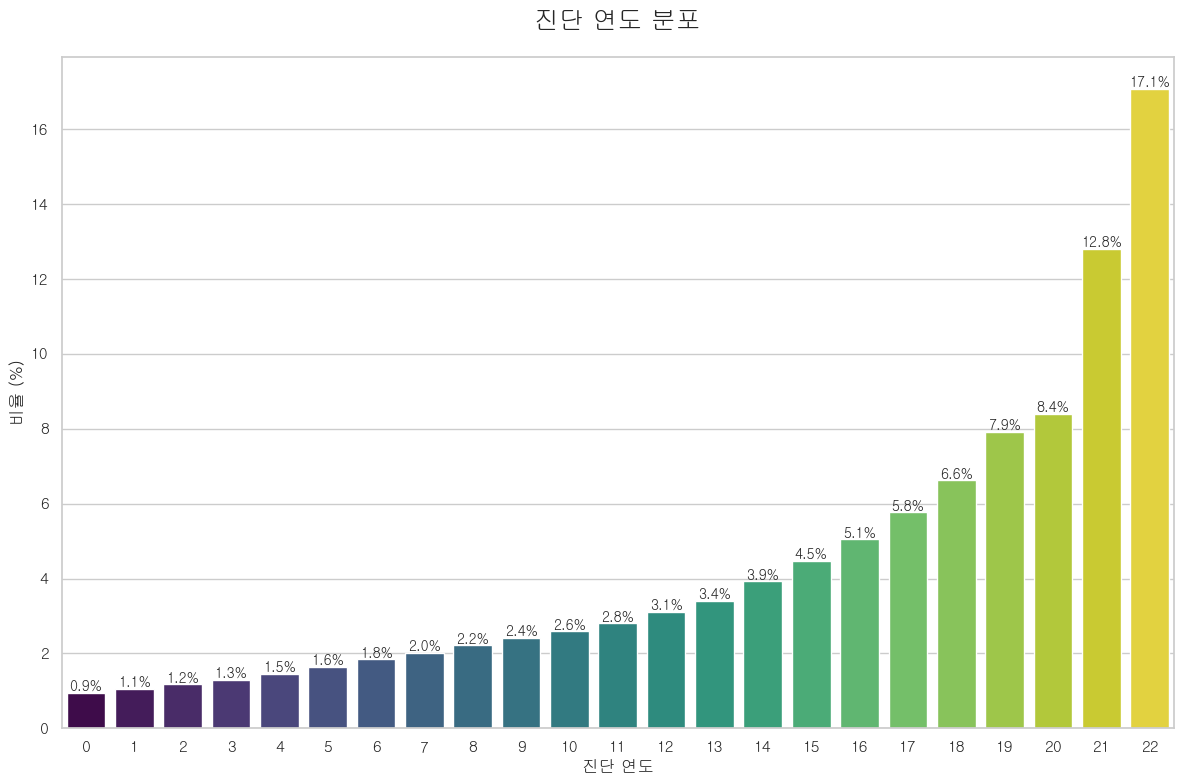

Site recode ICD-O-3/WHO 2008
10    39.102621
16    13.474375
2      8.454868
1      8.134348
18     7.393634
9      5.935413
19     4.040829
3      2.807066
0      2.723940
14     2.350540
4      1.931106
17     1.351889
8      1.258110
6      0.896884
12     0.052501
5      0.035191
13     0.021495
7      0.021305
11     0.011794
15     0.002092
Name: proportion, dtype: float64


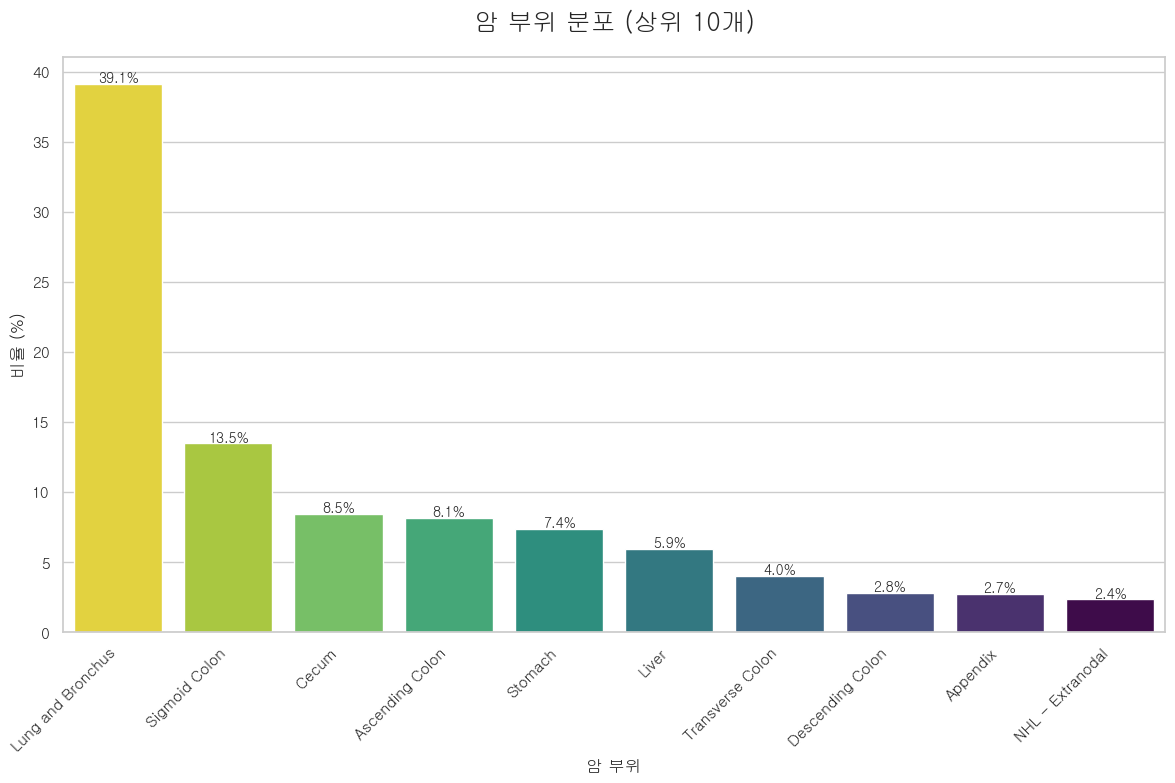

In [168]:
# 분석할 컬럼의 한글명과 실제 컬럼명 매핑 

for dict_idx, (kor_name, eng_name) in enumerate(column_mapping.items()):
    visualization_data(kor_name, eng_name, dict_idx)


In [32]:
encoded_df.columns

Index(['Patient ID', 'Age recode with <1 year olds and 90+', 'Sex',
       'Year of diagnosis', 'Year of follow-up recode',
       'Race recode (W, B, AI, API)', 'Site recode ICD-O-3/WHO 2008',
       'Primary Site', 'Primary Site - labeled',
       'Derived Summary Grade 2018 (2018+)', 'Laterality',
       'EOD Schema ID Recode (2010+)',
       'Combined Summary Stage with Expanded Regional Codes (2004+)',
       'RX Summ--Surg Prim Site (1998+)', 'RX Summ--Scope Reg LN Sur (2003+)',
       'RX Summ--Surg Oth Reg/Dis (2003+)', 'Sequence number',
       'Median household income inflation adj to 2023',
       'Number of Cores Positive Recode (2010+)',
       'Number of Cores Examined Recode (2010+)',
       'EOD Primary Tumor Recode (2018+)', 'PRCDA 2020', 'Survival months',
       'target_label', 'Survival months_bin_3m'],
      dtype='object')

### 산점도

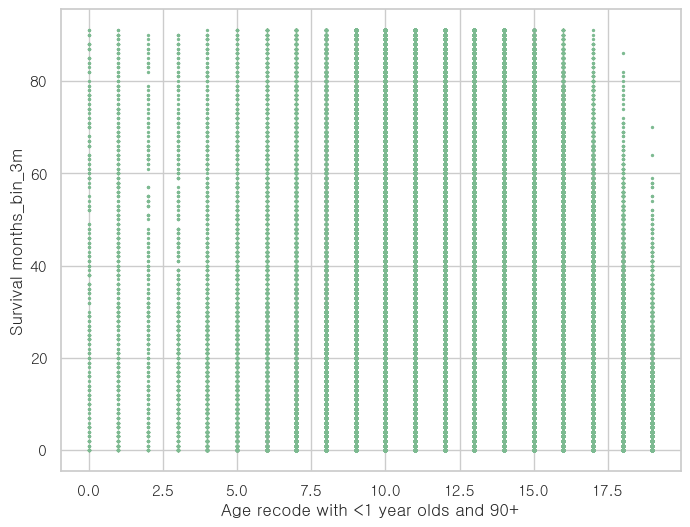

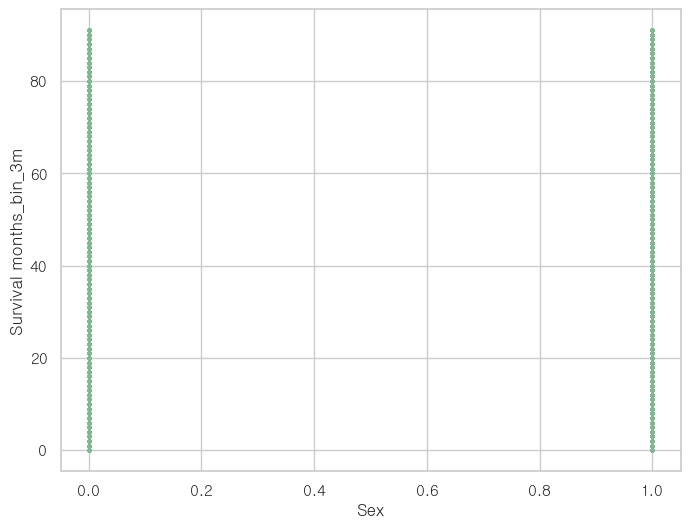

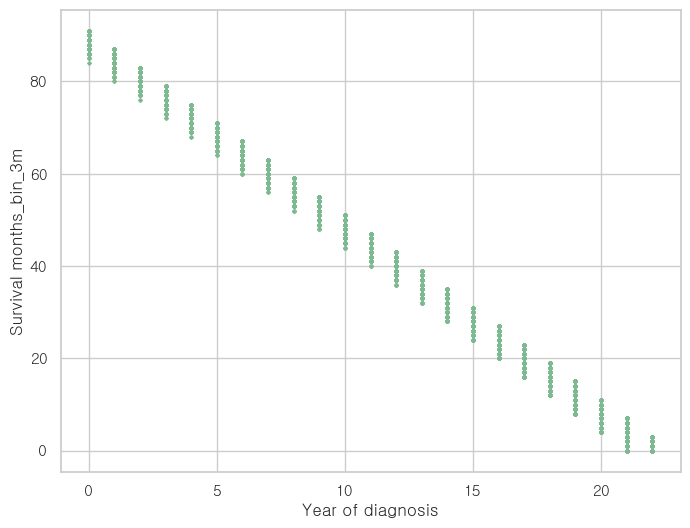

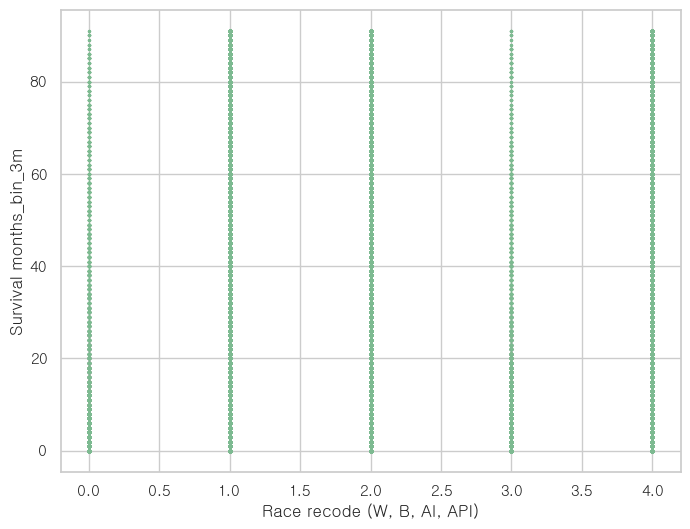

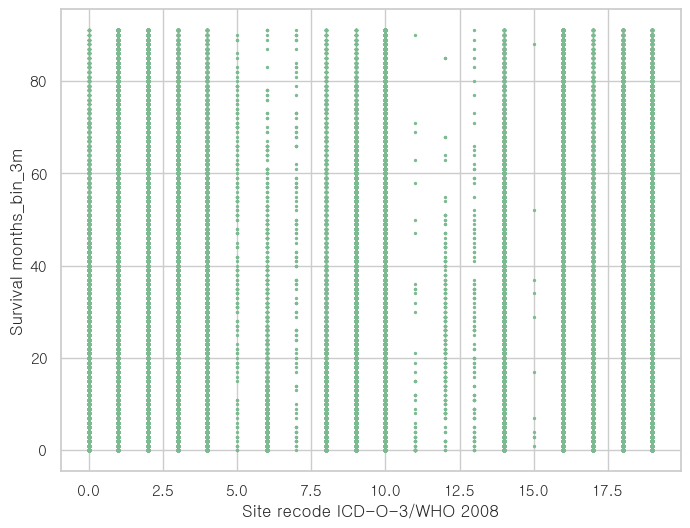

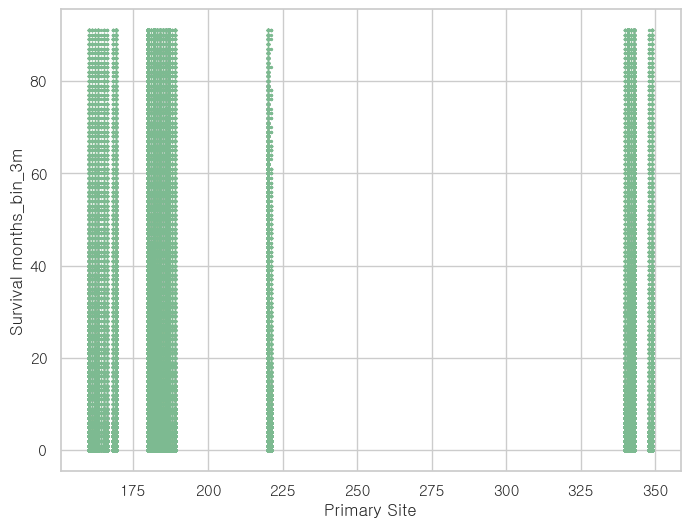

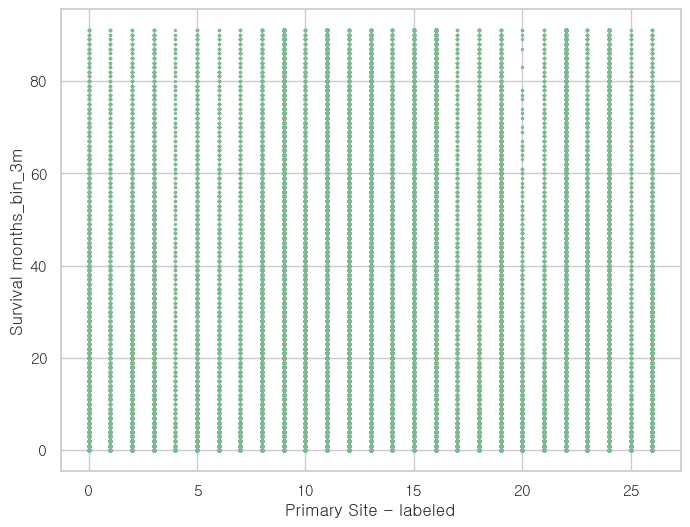

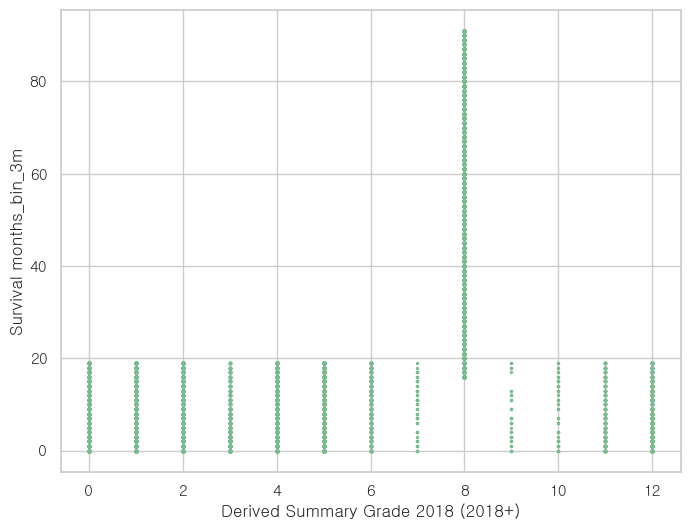

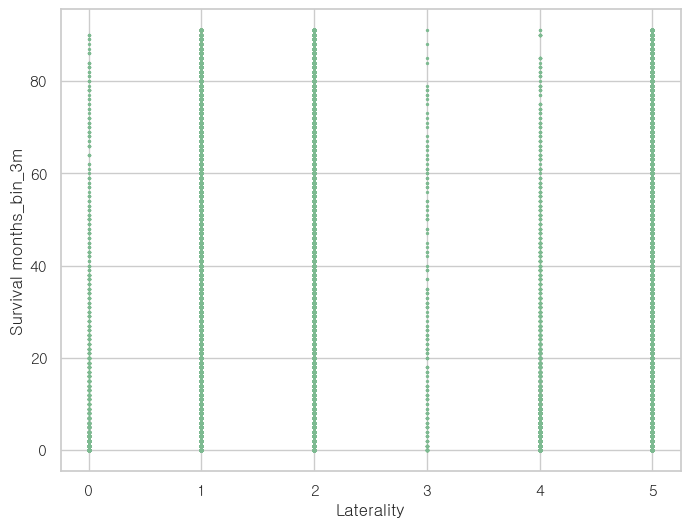

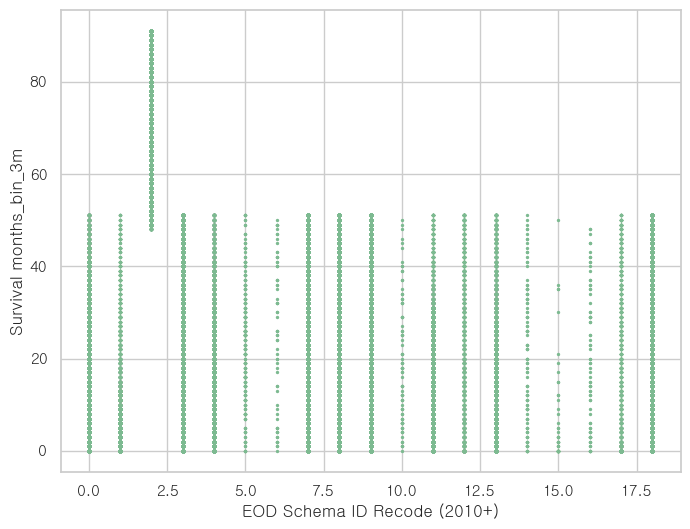

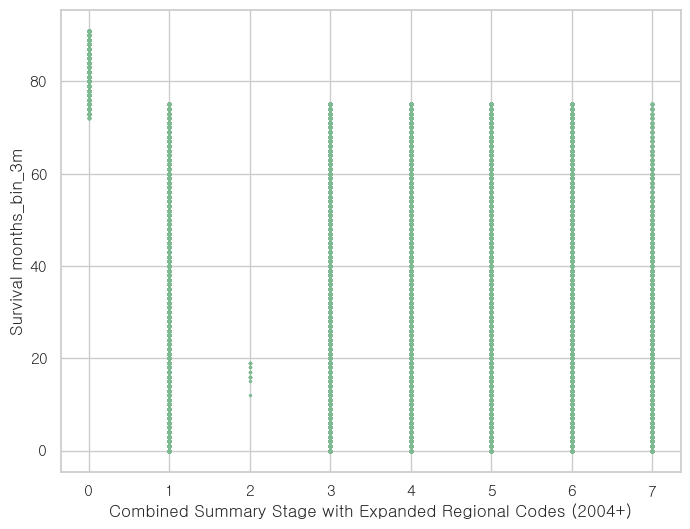

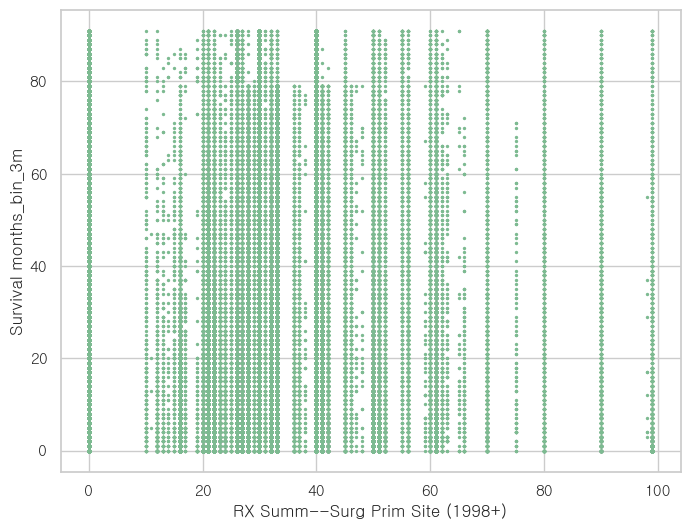

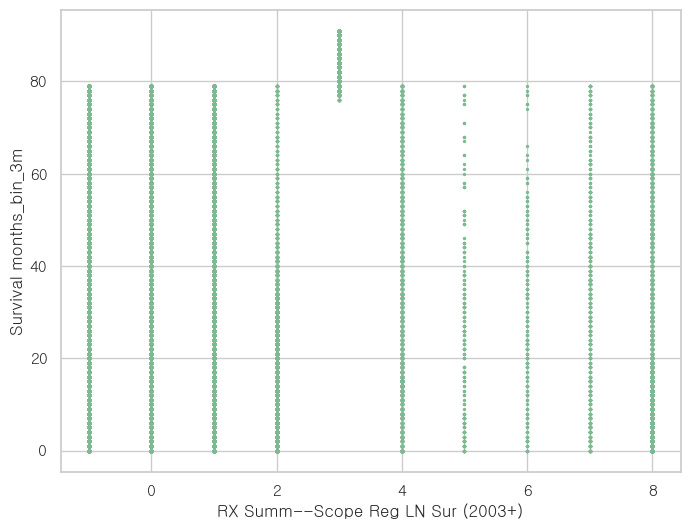

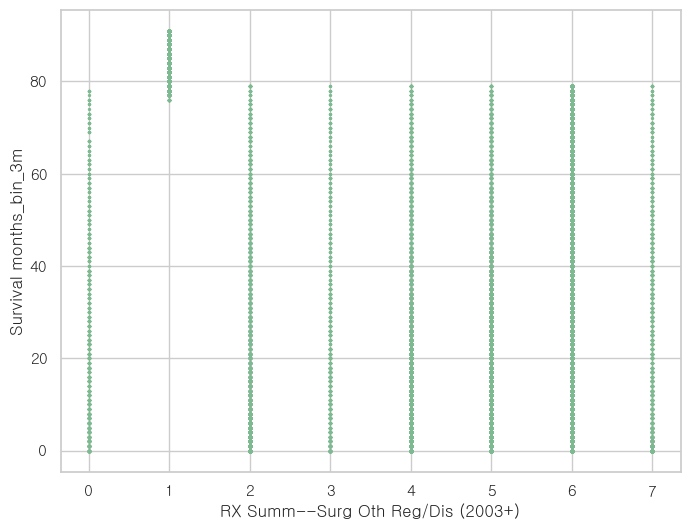

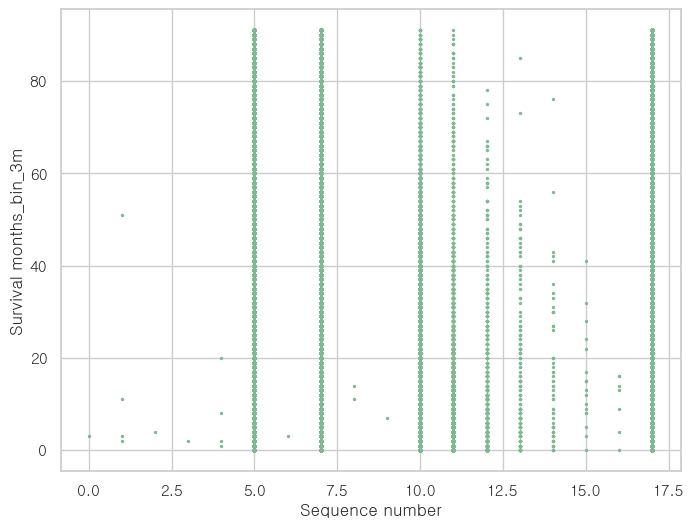

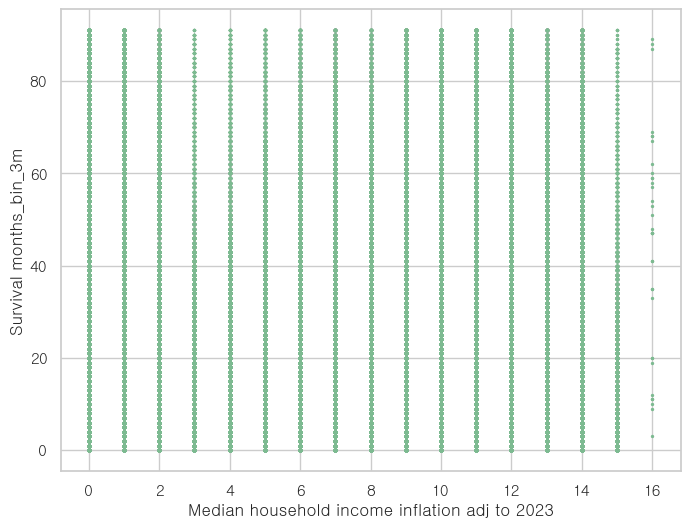

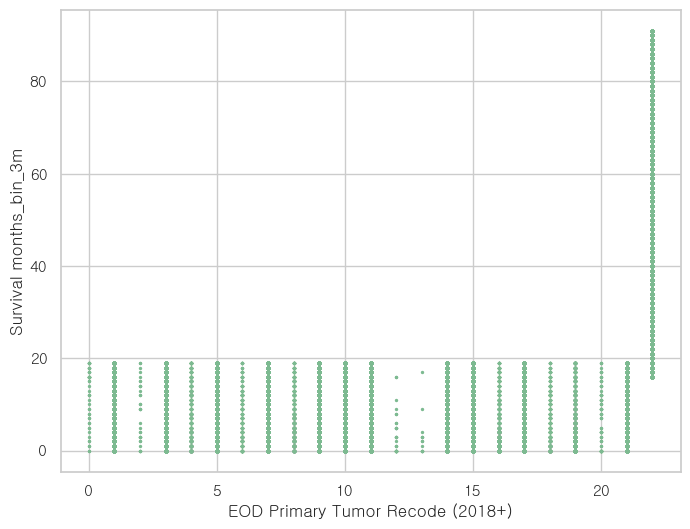

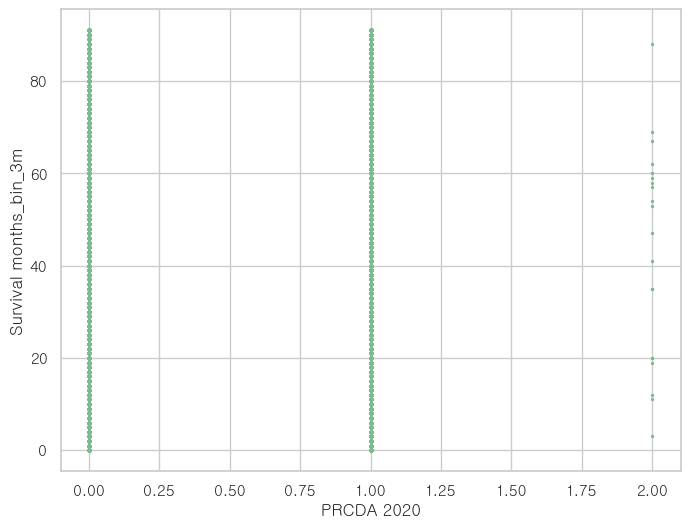

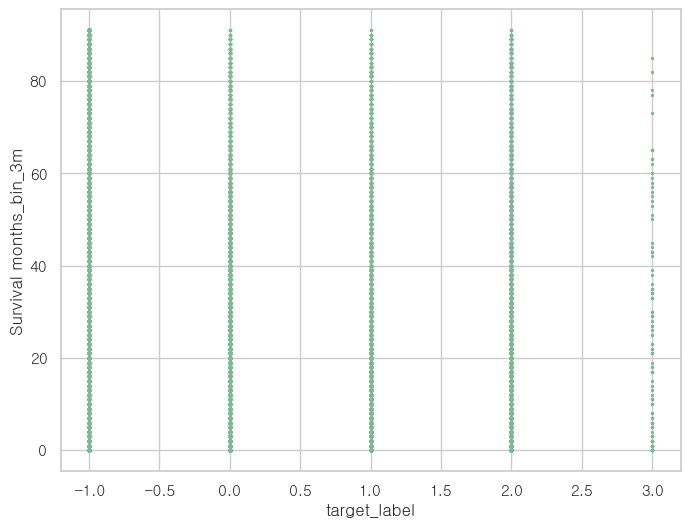

In [41]:
columns_select = encoded_df.drop(['Survival months_bin_3m', 
                                  'Patient ID', 
                                  'Year of follow-up recode',
                                  'Number of Cores Positive Recode (2010+)',
                                  'Number of Cores Examined Recode (2010+)',
                                  'Survival months'], axis=1).columns

for col in  columns_select:
    plt.figure(figsize = (8,6))
    plt.scatter(encoded_df[col], encoded_df['Survival months_bin_3m'], s=2)
    plt.xlabel(col)
    plt.ylabel('Survival months_bin_3m')
    plt.show()

### 기본 데이터 분석

In [115]:
df.info()
# 0   Patient ID                           528403 non-null  int64 
# 3   Year of diagnosis                    528403 non-null  int64 
# 4   Year of follow-up recode             528403 non-null  int64 
# 7   Primary Site                         528403 non-null  int64 
# 13  RX Summ--Surg Prim Site (1998+)      528403 non-null  int64 
# 빼고 다 object형 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528403 entries, 0 to 528402
Data columns (total 26 columns):
 #   Column                                                       Non-Null Count   Dtype 
---  ------                                                       --------------   ----- 
 0   Patient ID                                                   528403 non-null  int64 
 1   Age recode with <1 year olds and 90+                         528403 non-null  object
 2   Sex                                                          528403 non-null  object
 3   Year of diagnosis                                            528403 non-null  int64 
 4   Year of follow-up recode                                     528403 non-null  int64 
 5   Race recode (W, B, AI, API)                                  528403 non-null  object
 6   Site recode ICD-O-3/WHO 2008                                 528403 non-null  object
 7   Primary Site                                                 528403 non-nu

In [116]:
df.describe()

,Patient ID,Year of diagnosis,Year of follow-up recode,Primary Site,RX Summ--Surg Prim Site (1998+)
count,5.284030e+05,528403.000000,528403.0,528403.000000,528403.000000
mean,3.360487e+07,2016.103166,2022.0,247.653509,24.272519
std,1.834805e+07,5.813579,0.0,77.731198,18.876716
min,6.710000e+02,2000.000000,2022.0,160.000000,0.000000
25%,1.698095e+07,2013.000000,2022.0,182.000000,0.000000
50%,3.548133e+07,2018.000000,2022.0,187.000000,30.000000
75%,5.007004e+07,2021.000000,2022.0,341.000000,40.000000
max,6.345257e+07,2022.000000,2022.0,349.000000,99.000000


In [117]:
df.columns

Index(['Patient ID', 'Age recode with <1 year olds and 90+', 'Sex',
       'Year of diagnosis', 'Year of follow-up recode',
       'Race recode (W, B, AI, API)', 'Site recode ICD-O-3/WHO 2008',
       'Primary Site', 'Primary Site - labeled',
       'Derived Summary Grade 2018 (2018+)', 'Laterality',
       'EOD Schema ID Recode (2010+)',
       'Combined Summary Stage with Expanded Regional Codes (2004+)',
       'RX Summ--Surg Prim Site (1998+)', 'RX Summ--Scope Reg LN Sur (2003+)',
       'RX Summ--Surg Oth Reg/Dis (2003+)', 'COD to site recode',
       'Sequence number', 'Median household income inflation adj to 2023',
       'Number of Cores Positive Recode (2010+)',
       'Number of Cores Examined Recode (2010+)',
       'EOD Primary Tumor Recode (2018+)', 'PRCDA 2020',
       'Survival months flag', 'Survival months',
       'Vital status recode (study cutoff used)'],
      dtype='object')

In [5]:
df[df['Vital status recode (study cutoff used)'] == 'Dead']

,Patient ID,Age recode with <1 year olds and 90+,Sex,Year of diagnosis,Year of follow-up recode,"Race recode (W, B, AI, API)",Site recode ICD-O-3/WHO 2008,Primary Site,Primary Site - labeled,Derived Summary Grade 2018 (2018+),...,COD to site recode,Sequence number,Median household income inflation adj to 2023,Number of Cores Positive Recode (2010+),Number of Cores Examined Recode (2010+),EOD Primary Tumor Recode (2018+),PRCDA 2020,Survival months flag,Survival months,Vital status recode (study cutoff used)
5,1478,45-49 years,Male,2020,2022,White,Intrahepatic Bile Duct,221,C22.1-Intrahepatic bile duct,9,...,Intrahepatic Bile Duct,2nd of 2 or more primaries,"$120,000+",Blank(s),Blank(s),999,Not PRCDA,Complete dates are available and there are mor...,0022,Dead
19,5087,75-79 years,Female,2012,2022,White,Lung and Bronchus,343,"C34.3-Lower lobe, lung",Blank(s),...,Lung and Bronchus,2nd of 2 or more primaries,"$100,000 - $109,999",Blank(s),Blank(s),Blank(s),Not PRCDA,Complete dates are available and there are mor...,0130,Dead
23,6536,75-79 years,Female,2021,2022,White,Lung and Bronchus,342,"C34.2-Middle lobe, lung",3,...,Lung and Bronchus,2nd of 2 or more primaries,"$120,000+",Blank(s),Blank(s),700,Not PRCDA,Complete dates are available and there are mor...,0017,Dead
29,7961,75-79 years,Female,2017,2022,Asian or Pacific Islander,Lung and Bronchus,343,"C34.3-Lower lobe, lung",Blank(s),...,Lung and Bronchus,2nd of 2 or more primaries,"$120,000+",Blank(s),Blank(s),Blank(s),Not PRCDA,Complete dates are available and there are mor...,0062,Dead
33,8719,70-74 years,Female,2002,2022,White,Descending Colon,186,C18.6-Descending colon,Blank(s),...,Miscellaneous Malignant Cancer,1st of 2 or more primaries,"$120,000+",Blank(s),Blank(s),Blank(s),Not PRCDA,Complete dates are available and there are mor...,0244,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528398,63452555,75-79 years,Female,2022,2022,White,Lung and Bronchus,349,"C34.9-Lung, NOS",9,...,Lung and Bronchus,One primary only,"$55,000 - $59,999",Blank(s),Blank(s),999,Not PRCDA,Complete dates are available and there are mor...,0002,Dead
528399,63452558,70-74 years,Male,2022,2022,Black,Lung and Bronchus,349,"C34.9-Lung, NOS",9,...,Lung and Bronchus,One primary only,"$50,000 - $54,999",Blank(s),Blank(s),999,Not PRCDA,Complete dates are available and there are mor...,0002,Dead
528400,63452564,75-79 years,Male,2022,2022,White,"Large Intestine, NOS",189,"C18.9-Colon, NOS",9,...,Colon excluding Rectum,One primary only,"$80,000 - $84,999",Blank(s),Blank(s),999,Not PRCDA,Complete dates are available and there are mor...,0002,Dead
528401,63452565,90+ years,Female,2022,2022,White,"Large Intestine, NOS",189,"C18.9-Colon, NOS",9,...,Colon excluding Rectum,One primary only,"$90,000 - $94,999",Blank(s),Blank(s),999,Not PRCDA,Complete dates are available and there are mor...,0000,Dead


In [118]:
# 지완님이 만든 칼럼 설명 이용
column_df = pd.read_csv('../data/seer_columns_ko_mapping.csv')

In [ ]:
# df['Survival months'] = pd.to_numeric(df['Survival months'], errors='coerce')


In [146]:
columns_name = df.columns
for column in columns_name:
    print(f"<{column} : {column_df.loc[column_df['original_name']==column, 'korean_name'].iloc[0]}>의 유니크한 내용\n{df[column].unique()}")
    print('그 개수',df[column].nunique(), end='\n\n')

<Patient ID : 환자 ID>의 유니크한 내용
[     671      812      878 ... 63452564 63452565 63452570]
그 개수 501633

<Age recode with <1 year olds and 90+ : 나이 재코딩(만 1세 미만·90세 이상 구간 포함)>의 유니크한 내용
['65-69 years' '60-64 years' '70-74 years' '40-44 years' '45-49 years'
 '85-89 years' '55-59 years' '75-79 years' '30-34 years' '80-84 years'
 '50-54 years' '90+ years' '35-39 years' '20-24 years' '01-04 years'
 '10-14 years' '15-19 years' '25-29 years' '00 years' '05-09 years']
그 개수 20

<Sex : 성별>의 유니크한 내용
['Male' 'Female']
그 개수 2

<Year of diagnosis : 진단연도>의 유니크한 내용
[2018 2022 2004 2011 2007 2020 2019 2021 2016 2010 2015 2003 2012 2005
 2013 2017 2002 2009 2006 2014 2000 2001 2008]
그 개수 23

<Year of follow-up recode : 추적연도(재코딩)>의 유니크한 내용
[2022]
그 개수 1

<Race recode (W, B, AI, API) : 인종 재코딩(백/흑/아메리카원주민/아시아·태평양)>의 유니크한 내용
['White' 'Asian or Pacific Islander' 'Black'
 'American Indian/Alaska Native' 'Unknown']
그 개수 5

<Site recode ICD-O-3/WHO 2008 : 부위 재코딩(ICD-O-3/WHO 2008)>의 유니크한 내용
['Lung and Bronchus' 'St

In [121]:
patient_value_counts = df['Patient ID'].value_counts()
dupe_id = patient_value_counts[patient_value_counts > 1]          # 중복 ID와 각 등장 횟수
print('중복 환자 수:', dupe_id.shape[0])

print(dupe_id.head(5))       # 상위 5개


중복 환자 수: 24430
Patient ID
24206472    7
16011977    6
10709680    6
34959205    6
16257106    6
Name: count, dtype: int64


In [ ]:
df[df["Patient ID"] == 24206472]  # 최대 중복 행을 가지는 사람.

,Patient ID,Age recode with <1 year olds and 90+,Sex,Year of diagnosis,Year of follow-up recode,"Race recode (W, B, AI, API)",Site recode ICD-O-3/WHO 2008,Primary Site,Primary Site - labeled,Derived Summary Grade 2018 (2018+),...,COD to site recode,Sequence number,Median household income inflation adj to 2023,Number of Cores Positive Recode (2010+),Number of Cores Examined Recode (2010+),EOD Primary Tumor Recode (2018+),PRCDA 2020,Survival months flag,Survival months,Vital status recode (study cutoff used)
167297,24206472,50-54 years,Female,2014,2022,White,Stomach,162,C16.2-Body of stomach,Blank(s),...,Alive,4th of 4 or more primaries,"$120,000+",Blank(s),Blank(s),Blank(s),Not PRCDA,Complete dates are available and there are mor...,0098,Alive
167298,24206472,45-49 years,Female,2011,2022,White,Stomach,162,C16.2-Body of stomach,Blank(s),...,Alive,3rd of 3 or more primaries,"$110,000 - $119,999",Blank(s),Blank(s),Blank(s),Not PRCDA,Complete dates are available and there are mor...,0139,Alive
167299,24206472,40-44 years,Female,2005,2022,White,Stomach,169,"C16.9-Stomach, NOS",Blank(s),...,Alive,1st of 2 or more primaries,"$120,000+",Blank(s),Blank(s),Blank(s),Not PRCDA,Complete dates are available and there are mor...,0208,Alive
167300,24206472,40-44 years,Female,2007,2022,White,Stomach,162,C16.2-Body of stomach,Blank(s),...,Alive,2nd of 2 or more primaries,"$120,000+",Blank(s),Blank(s),Blank(s),Not PRCDA,Complete dates are available and there are mor...,0181,Alive
167301,24206472,50-54 years,Female,2016,2022,White,Stomach,169,"C16.9-Stomach, NOS",Blank(s),...,Alive,6th of 6 or more primaries,"$120,000+",Blank(s),Blank(s),Blank(s),Not PRCDA,Complete dates are available and there are mor...,0072,Alive
167302,24206472,50-54 years,Female,2015,2022,White,Stomach,162,C16.2-Body of stomach,Blank(s),...,Alive,5th of 5 or more primaries,"$120,000+",Blank(s),Blank(s),Blank(s),Not PRCDA,Complete dates are available and there are mor...,0085,Alive
167303,24206472,55-59 years,Female,2022,2022,White,Stomach,166,C16.6-Greater curvature of stomach NOS,9,...,Alive,7th of 7 or more primaries,"$120,000+",Blank(s),Blank(s),999,Not PRCDA,Complete dates are available and there are mor...,0011,Alive


In [ ]:
df[df["Patient ID"] == 16011977]

104259    Regional by direct extension only
104260    Regional by direct extension only
104261                             Blank(s)
104262                       Localized only
104263                       Localized only
104264                       Localized only
Name: Combined Summary Stage with Expanded Regional Codes (2004+), dtype: object

In [123]:
df[df['Sequence number'] == '34th of 34 or more primaries']

,Patient ID,Age recode with <1 year olds and 90+,Sex,Year of diagnosis,Year of follow-up recode,"Race recode (W, B, AI, API)",Site recode ICD-O-3/WHO 2008,Primary Site,Primary Site - labeled,Derived Summary Grade 2018 (2018+),...,COD to site recode,Sequence number,Median household income inflation adj to 2023,Number of Cores Positive Recode (2010+),Number of Cores Examined Recode (2010+),EOD Primary Tumor Recode (2018+),PRCDA 2020,Survival months flag,Survival months,Vital status recode (study cutoff used)
219895,27987549,45-49 years,Female,2021,2022,White,Lung and Bronchus,341,"C34.1-Upper lobe, lung",2,...,Alive,34th of 34 or more primaries,"$85,000 - $89,999",Blank(s),Blank(s),300,Not PRCDA,Complete dates are available and there are mor...,0021,Alive


In [124]:
df[df["Patient ID"] == 27987549]  # 34개의 원발암이 있는 사람.

,Patient ID,Age recode with <1 year olds and 90+,Sex,Year of diagnosis,Year of follow-up recode,"Race recode (W, B, AI, API)",Site recode ICD-O-3/WHO 2008,Primary Site,Primary Site - labeled,Derived Summary Grade 2018 (2018+),...,COD to site recode,Sequence number,Median household income inflation adj to 2023,Number of Cores Positive Recode (2010+),Number of Cores Examined Recode (2010+),EOD Primary Tumor Recode (2018+),PRCDA 2020,Survival months flag,Survival months,Vital status recode (study cutoff used)
219895,27987549,45-49 years,Female,2021,2022,White,Lung and Bronchus,341,"C34.1-Upper lobe, lung",2,...,Alive,34th of 34 or more primaries,"$85,000 - $89,999",Blank(s),Blank(s),300,Not PRCDA,Complete dates are available and there are mor...,0021,Alive


In [125]:
df[df['Sequence number'] == '30th of 30 or more primaries']

,Patient ID,Age recode with <1 year olds and 90+,Sex,Year of diagnosis,Year of follow-up recode,"Race recode (W, B, AI, API)",Site recode ICD-O-3/WHO 2008,Primary Site,Primary Site - labeled,Derived Summary Grade 2018 (2018+),...,COD to site recode,Sequence number,Median household income inflation adj to 2023,Number of Cores Positive Recode (2010+),Number of Cores Examined Recode (2010+),EOD Primary Tumor Recode (2018+),PRCDA 2020,Survival months flag,Survival months,Vital status recode (study cutoff used)
303024,36843270,80-84 years,Female,2019,2022,White,Lung and Bronchus,341,"C34.1-Upper lobe, lung",3,...,Alive,30th of 30 or more primaries,"$110,000 - $119,999",Blank(s),Blank(s),500,Not PRCDA,Complete dates are available and there are mor...,0043,Alive
307518,36957438,70-74 years,Male,2020,2022,White,Lung and Bronchus,341,"C34.1-Upper lobe, lung",3,...,Alive,30th of 30 or more primaries,"$80,000 - $84,999",Blank(s),Blank(s),700,PRCDA,Complete dates are available and there are mor...,0034,Alive


In [126]:
df[df["Patient ID"] == 36843270]  # 30개의 원발암이 있는 사람.

,Patient ID,Age recode with <1 year olds and 90+,Sex,Year of diagnosis,Year of follow-up recode,"Race recode (W, B, AI, API)",Site recode ICD-O-3/WHO 2008,Primary Site,Primary Site - labeled,Derived Summary Grade 2018 (2018+),...,COD to site recode,Sequence number,Median household income inflation adj to 2023,Number of Cores Positive Recode (2010+),Number of Cores Examined Recode (2010+),EOD Primary Tumor Recode (2018+),PRCDA 2020,Survival months flag,Survival months,Vital status recode (study cutoff used)
303024,36843270,80-84 years,Female,2019,2022,White,Lung and Bronchus,341,"C34.1-Upper lobe, lung",3,...,Alive,30th of 30 or more primaries,"$110,000 - $119,999",Blank(s),Blank(s),500,Not PRCDA,Complete dates are available and there are mor...,0043,Alive


In [127]:
df[df["Patient ID"] == 36957438]  # 30개의 원발암이 있는 사람.

,Patient ID,Age recode with <1 year olds and 90+,Sex,Year of diagnosis,Year of follow-up recode,"Race recode (W, B, AI, API)",Site recode ICD-O-3/WHO 2008,Primary Site,Primary Site - labeled,Derived Summary Grade 2018 (2018+),...,COD to site recode,Sequence number,Median household income inflation adj to 2023,Number of Cores Positive Recode (2010+),Number of Cores Examined Recode (2010+),EOD Primary Tumor Recode (2018+),PRCDA 2020,Survival months flag,Survival months,Vital status recode (study cutoff used)
307518,36957438,70-74 years,Male,2020,2022,White,Lung and Bronchus,341,"C34.1-Upper lobe, lung",3,...,Alive,30th of 30 or more primaries,"$80,000 - $84,999",Blank(s),Blank(s),700,PRCDA,Complete dates are available and there are mor...,0034,Alive


In [ ]:
df[df['Survival months'] == '0000']  # 이 사람들은 생존 여부는 혼재,
# df[df['Survival months'] == 0]  # 숫자형으로 바꿨을 때 조회

,Patient ID,Age recode with <1 year olds and 90+,Sex,Year of diagnosis,Year of follow-up recode,"Race recode (W, B, AI, API)",Site recode ICD-O-3/WHO 2008,Primary Site,Primary Site - labeled,Derived Summary Grade 2018 (2018+),...,COD to site recode,Sequence number,Median household income inflation adj to 2023,Number of Cores Positive Recode (2010+),Number of Cores Examined Recode (2010+),EOD Primary Tumor Recode (2018+),PRCDA 2020,Survival months flag,Survival months,Vital status recode (study cutoff used)
443,411137,85-89 years,Female,2022,2022,White,Intrahepatic Bile Duct,221,C22.1-Intrahepatic bile duct,9,...,Alive,2nd of 2 or more primaries,"$120,000+",Blank(s),Blank(s),300,Not PRCDA,Complete dates are available and there are mor...,0.0,Alive
477,437782,75-79 years,Male,2022,2022,Black,Lung and Bronchus,343,"C34.3-Lower lobe, lung",9,...,Prostate,3rd of 3 or more primaries,"$120,000+",Blank(s),Blank(s),650,Not PRCDA,Complete dates are available and there are mor...,0.0,Dead
736,595206,90+ years,Female,2022,2022,Asian or Pacific Islander,Lung and Bronchus,349,"C34.9-Lung, NOS",9,...,Lung and Bronchus,2nd of 2 or more primaries,"$120,000+",Blank(s),Blank(s),999,Not PRCDA,Complete dates are available and there are mor...,0.0,Dead
825,637126,75-79 years,Female,2022,2022,White,Cecum,180,C18.0-Cecum,3,...,Colon excluding Rectum,2nd of 2 or more primaries,"$120,000+",Blank(s),Blank(s),999,Not PRCDA,Complete dates are available and there are mor...,0.0,Dead
891,664090,70-74 years,Female,2022,2022,White,Cecum,180,C18.0-Cecum,2,...,Alive,3rd of 3 or more primaries,"$120,000+",Blank(s),Blank(s),500,Not PRCDA,Complete dates are available and there are mor...,0.0,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528382,63452348,70-74 years,Male,2021,2022,Black,Liver,220,C22.0-Liver,9,...,Liver,One primary only,"$45,000 - $49,999",Blank(s),Blank(s),999,Not PRCDA,Complete dates are available and there are mor...,0.0,Dead
528390,63452512,70-74 years,Male,2022,2022,White,Liver,220,C22.0-Liver,9,...,Liver,One primary only,"$45,000 - $49,999",Blank(s),Blank(s),999,Not PRCDA,Complete dates are available and there are mor...,0.0,Dead
528391,63452528,70-74 years,Male,2022,2022,White,Lung and Bronchus,349,"C34.9-Lung, NOS",9,...,Miscellaneous Malignant Cancer,One primary only,"$70,000 - $74,999",Blank(s),Blank(s),999,Not PRCDA,Complete dates are available and there are mor...,0.0,Dead
528395,63452545,70-74 years,Male,2022,2022,Black,Lung and Bronchus,349,"C34.9-Lung, NOS",9,...,Lung and Bronchus,One primary only,"$70,000 - $74,999",Blank(s),Blank(s),999,Not PRCDA,Complete dates are available and there are mor...,0.0,Dead


In [ ]:
df[df['Survival months'] == 'Unknown']['Vital status recode (study cutoff used)'].value_counts() # 이 사람들은 다 Dead
# df[df['Survival months'].isna()] # 숫자형으로 바꿨을 때 조회

,Patient ID,Age recode with <1 year olds and 90+,Sex,Year of diagnosis,Year of follow-up recode,"Race recode (W, B, AI, API)",Site recode ICD-O-3/WHO 2008,Primary Site,Primary Site - labeled,Derived Summary Grade 2018 (2018+),...,COD to site recode,Sequence number,Median household income inflation adj to 2023,Number of Cores Positive Recode (2010+),Number of Cores Examined Recode (2010+),EOD Primary Tumor Recode (2018+),PRCDA 2020,Survival months flag,Survival months,Vital status recode (study cutoff used)
129,111243,90+ years,Female,2022,2022,Black,Liver,220,C22.0-Liver,9,...,Liver,2nd of 2 or more primaries,"$120,000+",Blank(s),Blank(s),999,Not PRCDA,Not calculated because a Death Certificate Onl...,NaN,Dead
9333,1228711,90+ years,Female,2022,2022,White,"Large Intestine, NOS",189,"C18.9-Colon, NOS",9,...,Colon excluding Rectum,2nd of 2 or more primaries,"$120,000+",Blank(s),Blank(s),999,Not PRCDA,Not calculated because a Death Certificate Onl...,NaN,Dead
12460,1346708,80-84 years,Male,2022,2022,White,Lung and Bronchus,349,"C34.9-Lung, NOS",9,...,Lung and Bronchus,One primary only,"$120,000+",Blank(s),Blank(s),999,Not PRCDA,Not calculated because a Death Certificate Onl...,NaN,Dead
14750,1417699,85-89 years,Female,2022,2022,Asian or Pacific Islander,"Large Intestine, NOS",189,"C18.9-Colon, NOS",9,...,Colon excluding Rectum,2nd of 2 or more primaries,"$120,000+",Blank(s),Blank(s),999,Not PRCDA,Not calculated because a Death Certificate Onl...,NaN,Dead
20263,1558003,85-89 years,Male,2022,2022,Asian or Pacific Islander,Sigmoid Colon,187,C18.7-Sigmoid colon,9,...,Colon excluding Rectum,2nd of 2 or more primaries,"$120,000+",Blank(s),Blank(s),999,Not PRCDA,Not calculated because a Death Certificate Onl...,NaN,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528339,63450762,70-74 years,Male,2022,2022,White,Lung and Bronchus,349,"C34.9-Lung, NOS",9,...,Pneumonia and Influenza,One primary only,"$80,000 - $84,999",Blank(s),Blank(s),999,Not PRCDA,Not calculated because a Death Certificate Onl...,NaN,Dead
528340,63450767,60-64 years,Male,2022,2022,White,Liver,220,C22.0-Liver,9,...,Liver,One primary only,"$55,000 - $59,999",Blank(s),Blank(s),999,Not PRCDA,Not calculated because a Death Certificate Onl...,NaN,Dead
528341,63450773,55-59 years,Female,2022,2022,White,Stomach,169,"C16.9-Stomach, NOS",9,...,Stomach,One primary only,"$65,000 - $69,999",Blank(s),Blank(s),999,Not PRCDA,Not calculated because a Death Certificate Onl...,NaN,Dead
528342,63450780,55-59 years,Female,2022,2022,White,"Large Intestine, NOS",189,"C18.9-Colon, NOS",9,...,Suicide and Self-Inflicted Injury,One primary only,"$50,000 - $54,999",Blank(s),Blank(s),999,Not PRCDA,Not calculated because a Death Certificate Onl...,NaN,Dead


### 다수 원발암 vs 단일 원발암 관련 시각화
선정 이유
- 다수 원발암의 환자는 중복된 행을 가지고 있는데 중복된 행이 학습에 불리하게 적용될 수 있으니 어떻게 처리하는 게 좋을지 고민하였다. 
- 그래서 일단 다수 원발암과 단일 원발암 사이에 생존률의 차이가 있는지를 확인하기 위해 다수 원발암과 단일 원발암으로 나눈 후 시각화하였다.

결론
- 평균 생존 기간은 다수 원발암이 더 길다.
- 케플란마이어 그래프를 그려보면 원래 단일암 환자의 생존률이 더 낮다가 약135일을 기준으로 역전된다.
- 이 데이터를 어떻게 해석할 수 있을까?


- 어쨌든 둘의 차이가 있으므로 다수 원발암의 중복 행을 줄이고 다수 원발암임을 알릴 수 있는 컬럼을 추가하는 것도 좋을 것 같다. 

In [7]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.ticker as mstick
import matplotlib.font_manager as fm 
import matplotlib
import pandas as pd
import seaborn as sns
from lifelines import KaplanMeierFitter # 생존 분석을 위해 추가


# seaborn의 기본 테마를 설정합니다. 'whitegrid' 스타일과 'crest' 색상 팔레트를 사용합니다.
sns.set_theme(style="whitegrid", palette="crest")

# 한글 폰트 사용을 위해 설정한다.
font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

# 마이너스 부호가 깨지는 것을 방지하는 설정입니다.
plt.rc('axes', unicode_minus=False)

# 데이터셋 병합 (사용자 제공 코드와 동일하나, 경로 수정 및 low_memory=False 추가)
DATA_PATH1 = '../data/2022Data_part1.csv'
DATA_PATH2 = '../data/2022Data_part2.csv'
df_part1 = pd.read_csv(DATA_PATH1, low_memory=False)
df_part2 = pd.read_csv(DATA_PATH2, low_memory=False)

# DeepSurv 분석용 샘플 데이터를 불러오고 기본 전처리를 수행합니다.
df = pd.concat([df_part1, df_part2], ignore_index=True).rename(columns=lambda col: col.strip())


In [8]:
# ----------------------------------------------------------------------
# [추가 코드 시작] - 중복 환자 처리 및 생존 분석
# ----------------------------------------------------------------------

# Feature Engineering: Has_Multiple_Primaries 특성 생성 및 첫 번째 진단만 선택
# 환자 ID별 원발암 개수 계산
primary_counts = df.groupby('Patient ID').size().reset_index(name='Primary_Count')

# 다수 원발암 여부 플래그 생성 (2개 이상이면 1, 아니면 0)
primary_counts['Has_Multiple_Primaries'] = (primary_counts['Primary_Count'] > 1).astype(int)

# 첫 번째 원발암 레코드만 필터링 (다수암 df 중 첫 번째 진단만 남기는 작업 포함)
first_primary_cases = ['One primary only', '1st of 2 or more primaries']
df_single_case = df[df['Sequence number'].isin(first_primary_cases)].copy()

# 필터링된 데이터셋에 다수 원발암 여부 특성 병합
df_final = pd.merge(df_single_case, 
                     primary_counts[['Patient ID', 'Has_Multiple_Primaries']], 
                     on='Patient ID', 
                     how='left')

# 생존 분석을 위한 데이터 전처리
# 'Survival months'를 숫자형으로 변환 및 결측치 제거
df_final['Survival months'] = pd.to_numeric(df_final['Survival months'], errors='coerce')

# Vital Status (생존 상태)를 이벤트(E) 코드로 변환
# 'Dead'을 1 (이벤트 발생), 'Alive'를 0 (중단/Censored)으로 설정
df_final['Event'] = (df_final['Vital status recode (study cutoff used)'] == 'Dead').astype(int)

# 생존 분석에 필요한 컬럼('Survival months', 'Event')에 결측치(NaN)가 있는 행 제거
df_final.dropna(subset=['Survival months', 'Event'], inplace=True)


# 하나의 암 df와 다수 암 df로 분리
# Has_Multiple_Primaries: 0 = 단일 원발암, 1 = 다수 원발암
single_primary_df = df_final[df_final['Has_Multiple_Primaries'] == 0].copy()
multiple_primary_df = df_final[df_final['Has_Multiple_Primaries'] == 1].copy()

print(f"1. 단일 원발암 환자 (One Primary Only) 수: {len(single_primary_df)}명")
print(f"2. 다수 원발암 환자 (Multiple Primaries) 수: {len(multiple_primary_df)}명")


1. 단일 원발암 환자 (One Primary Only) 수: 396828명
2. 다수 원발암 환자 (Multiple Primaries) 수: 19290명


In [15]:
# print(primary_counts)
df_single_case[df_single_case['Vital status recode (study cutoff used)'] == 'Dead']

,Patient ID,Age recode with <1 year olds and 90+,Sex,Year of diagnosis,Year of follow-up recode,"Race recode (W, B, AI, API)",Site recode ICD-O-3/WHO 2008,Primary Site,Primary Site - labeled,Derived Summary Grade 2018 (2018+),...,COD to site recode,Sequence number,Median household income inflation adj to 2023,Number of Cores Positive Recode (2010+),Number of Cores Examined Recode (2010+),EOD Primary Tumor Recode (2018+),PRCDA 2020,Survival months flag,Survival months,Vital status recode (study cutoff used)
33,8719,70-74 years,Female,2002,2022,White,Descending Colon,186,C18.6-Descending colon,Blank(s),...,Miscellaneous Malignant Cancer,1st of 2 or more primaries,"$120,000+",Blank(s),Blank(s),Blank(s),Not PRCDA,Complete dates are available and there are mor...,0244,Dead
35,8869,80-84 years,Female,2002,2022,White,Transverse Colon,184,C18.4-Transverse colon,Blank(s),...,Other Cause of Death,One primary only,"$100,000 - $109,999",Blank(s),Blank(s),Blank(s),Not PRCDA,Complete dates are available and there are mor...,0241,Dead
66,15342,75-79 years,Female,2013,2022,White,Cecum,180,C18.0-Cecum,Blank(s),...,Diseases of Heart,One primary only,"$120,000+",Blank(s),Blank(s),Blank(s),Not PRCDA,Complete dates are available and there are mor...,0105,Dead
138,121699,75-79 years,Female,2022,2022,White,Lung and Bronchus,343,"C34.3-Lower lobe, lung",9,...,Other Cause of Death,One primary only,"$120,000+",Blank(s),Blank(s),700,Not PRCDA,Complete dates are available and there are mor...,0002,Dead
149,132232,65-69 years,Female,2015,2022,White,Lung and Bronchus,343,"C34.3-Lower lobe, lung",Blank(s),...,Lung and Bronchus,One primary only,"$120,000+",Blank(s),Blank(s),Blank(s),Not PRCDA,Complete dates are available and there are mor...,0075,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528398,63452555,75-79 years,Female,2022,2022,White,Lung and Bronchus,349,"C34.9-Lung, NOS",9,...,Lung and Bronchus,One primary only,"$55,000 - $59,999",Blank(s),Blank(s),999,Not PRCDA,Complete dates are available and there are mor...,0002,Dead
528399,63452558,70-74 years,Male,2022,2022,Black,Lung and Bronchus,349,"C34.9-Lung, NOS",9,...,Lung and Bronchus,One primary only,"$50,000 - $54,999",Blank(s),Blank(s),999,Not PRCDA,Complete dates are available and there are mor...,0002,Dead
528400,63452564,75-79 years,Male,2022,2022,White,"Large Intestine, NOS",189,"C18.9-Colon, NOS",9,...,Colon excluding Rectum,One primary only,"$80,000 - $84,999",Blank(s),Blank(s),999,Not PRCDA,Complete dates are available and there are mor...,0002,Dead
528401,63452565,90+ years,Female,2022,2022,White,"Large Intestine, NOS",189,"C18.9-Colon, NOS",9,...,Colon excluding Rectum,One primary only,"$90,000 - $94,999",Blank(s),Blank(s),999,Not PRCDA,Complete dates are available and there are mor...,0000,Dead


In [16]:
df_single_case['Median household income inflation adj to 2023'].value_counts()

Median household income inflation adj to 2023
$85,000 - $89,999                         51919
$75,000 - $79,999                         45031
$100,000 - $109,999                       42721
$120,000+                                 36228
$80,000 - $84,999                         35943
$65,000 - $69,999                         29606
$70,000 - $74,999                         28978
$110,000 - $119,999                       24499
$95,000 - $99,999                         24189
$60,000 - $64,999                         23717
$90,000 - $94,999                         19953
$55,000 - $59,999                         18265
$50,000 - $54,999                         16361
$45,000 - $49,999                         10006
$40,000 - $44,999                          6161
< $40,000                                  4433
Unknown/missing/no match/Not 1990-2023       26
Name: count, dtype: int64

In [17]:
df_single_case[df_single_case['Vital status recode (study cutoff used)'] == 'Dead']['Median household income inflation adj to 2023'].value_counts()

Median household income inflation adj to 2023
$85,000 - $89,999                         9430
$100,000 - $109,999                       5924
$75,000 - $79,999                         5421
$120,000+                                 5323
$65,000 - $69,999                         4902
$80,000 - $84,999                         4720
$60,000 - $64,999                         3292
$70,000 - $74,999                         3192
$110,000 - $119,999                       3077
$95,000 - $99,999                         3065
$55,000 - $59,999                         2973
$50,000 - $54,999                         2727
$90,000 - $94,999                         2622
$45,000 - $49,999                         1584
$40,000 - $44,999                          992
< $40,000                                  796
Unknown/missing/no match/Not 1990-2023       2
Name: count, dtype: int64

In [18]:
df_single_case[df_single_case['Vital status recode (study cutoff used)'] == 'Alive']['Median household income inflation adj to 2023'].value_counts()

Median household income inflation adj to 2023
$85,000 - $89,999                         42489
$75,000 - $79,999                         39610
$100,000 - $109,999                       36797
$80,000 - $84,999                         31223
$120,000+                                 30905
$70,000 - $74,999                         25786
$65,000 - $69,999                         24704
$110,000 - $119,999                       21422
$95,000 - $99,999                         21124
$60,000 - $64,999                         20425
$90,000 - $94,999                         17331
$55,000 - $59,999                         15292
$50,000 - $54,999                         13634
$45,000 - $49,999                          8422
$40,000 - $44,999                          5169
< $40,000                                  3637
Unknown/missing/no match/Not 1990-2023       24
Name: count, dtype: int64

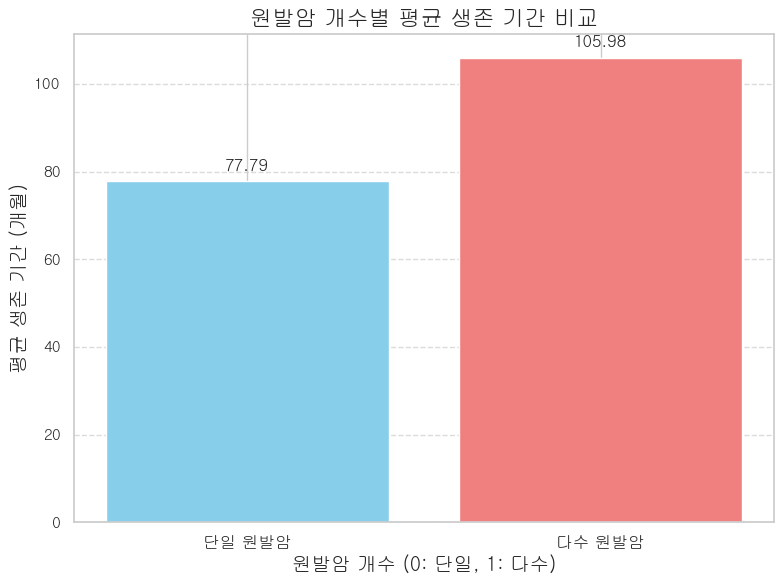

In [131]:
# ----------------------------------------------------------------------
# 평균 생존 기간 막대그래프 (Bar Plot)
# ----------------------------------------------------------------------
avg_survival = df_final.groupby('Has_Multiple_Primaries')['Survival months'].mean().round(2)

plt.figure(figsize=(8, 6))
plt.bar(x=[0, 1], height=avg_survival.values, color=['skyblue', 'lightcoral'])
plt.title('원발암 개수별 평균 생존 기간 비교', fontsize=16)
plt.ylabel('평균 생존 기간 (개월)', fontsize=14)
plt.xlabel('원발암 개수 (0: 단일, 1: 다수)', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['단일 원발암', '다수 원발암'], fontsize=12, rotation=0)

# 막대 위에 값 표시
for i, v in enumerate(avg_survival.values):
    plt.text(i, v + 2, f'{v:.2f}', ha='center', va='bottom', fontsize=12)

plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() 



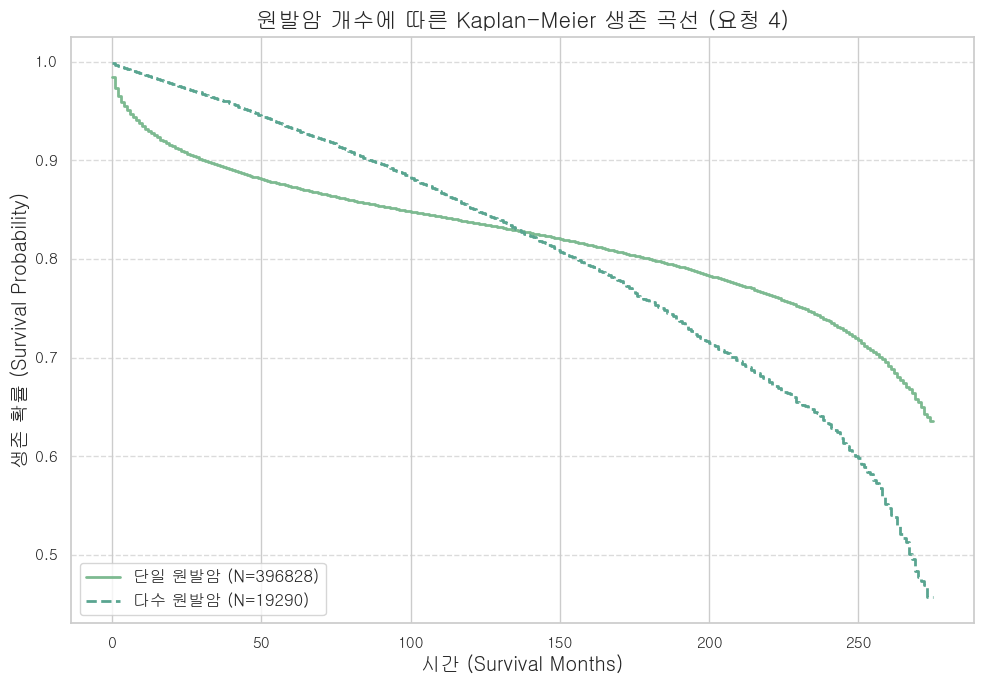

In [132]:
# ----------------------------------------------------------------------
# 시간에 따른 생존률 그래프 (Kaplan-Meier Survival Curve)
# ----------------------------------------------------------------------
kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 7))

# 4-1. 단일 원발암 환자 생존 곡선
T_single = single_primary_df['Survival months']
E_single = single_primary_df['Event']
kmf.fit(T_single, event_observed=E_single, label=f'단일 원발암 (N={len(T_single)})')
kmf.plot(ci_show=False, linewidth=2, linestyle='-') 

# 4-2. 다수 원발암 환자 생존 곡선
T_multiple = multiple_primary_df['Survival months']
E_multiple = multiple_primary_df['Event']
kmf.fit(T_multiple, event_observed=E_multiple, label=f'다수 원발암 (N={len(T_multiple)})')
kmf.plot(ci_show=False, linewidth=2, linestyle='--')

plt.title('원발암 개수에 따른 Kaplan-Meier 생존 곡선 (요청 4)', fontsize=16)
plt.xlabel('시간 (Survival Months)', fontsize=14)
plt.ylabel('생존 확률 (Survival Probability)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower left', fontsize=12)
plt.tight_layout()
plt.show()


### 데이터의 분포 시각화(성별, 인종, 나이, 진단 연도, 암 부위)

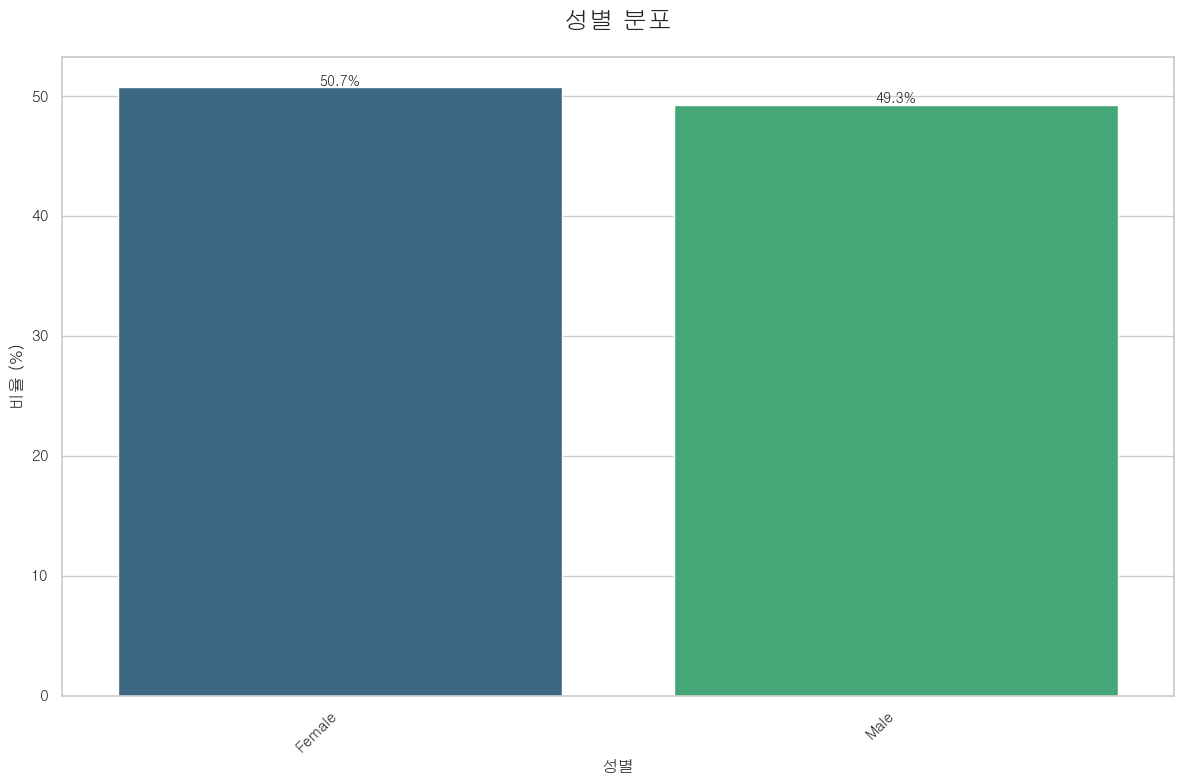

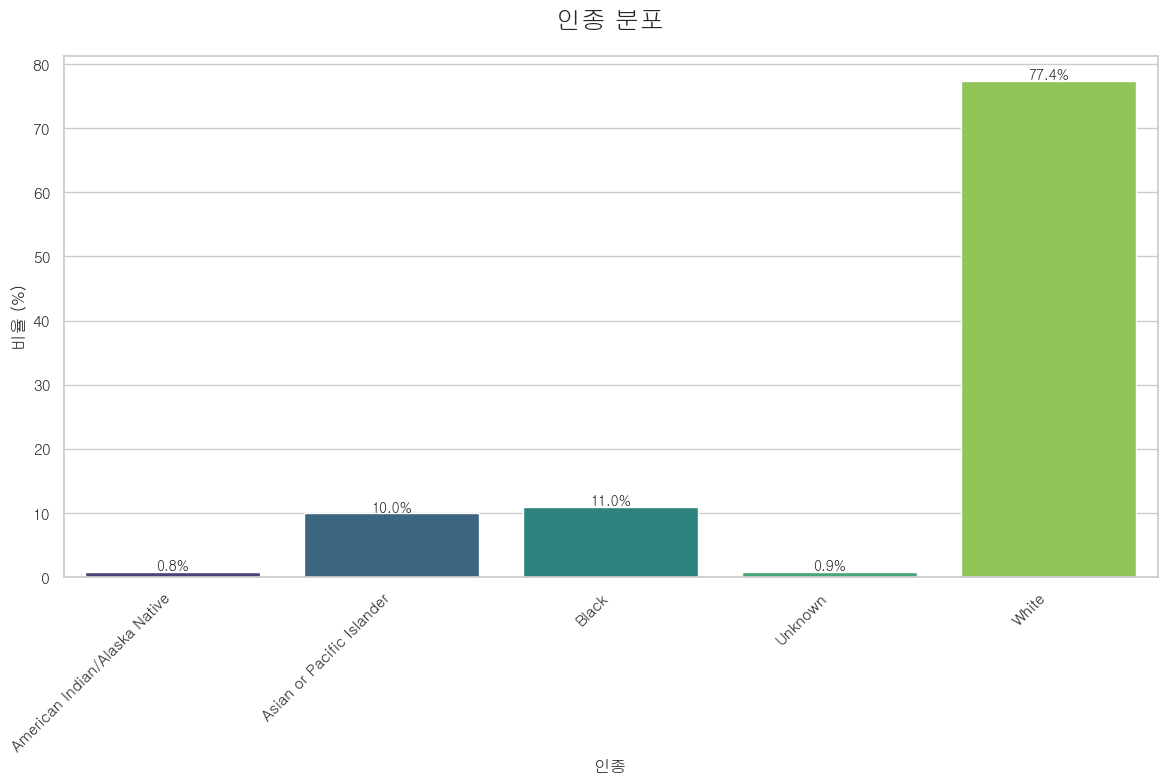

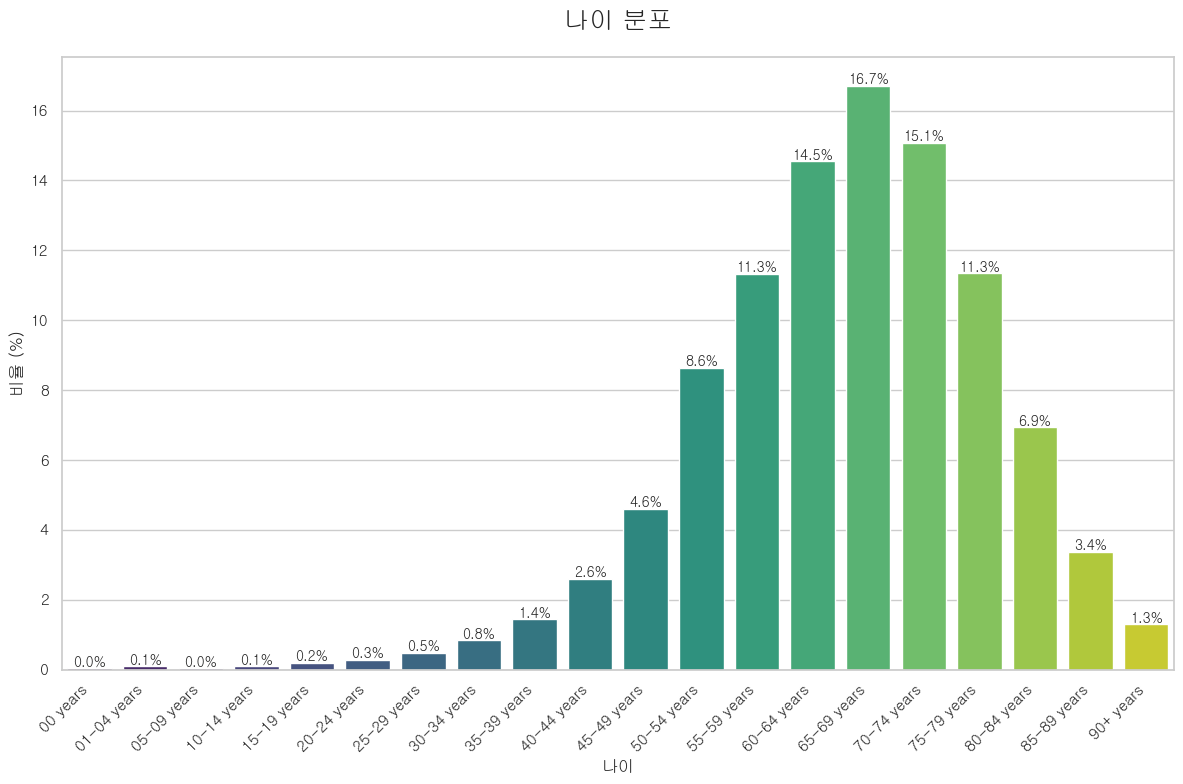

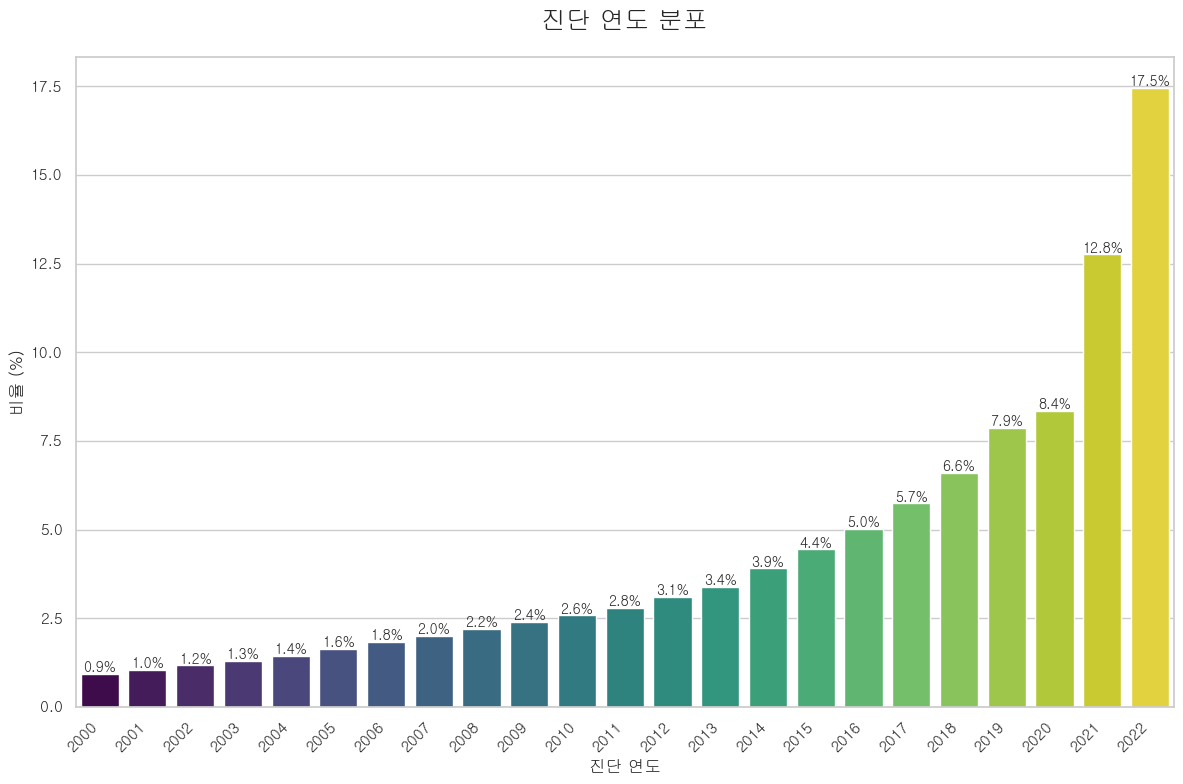

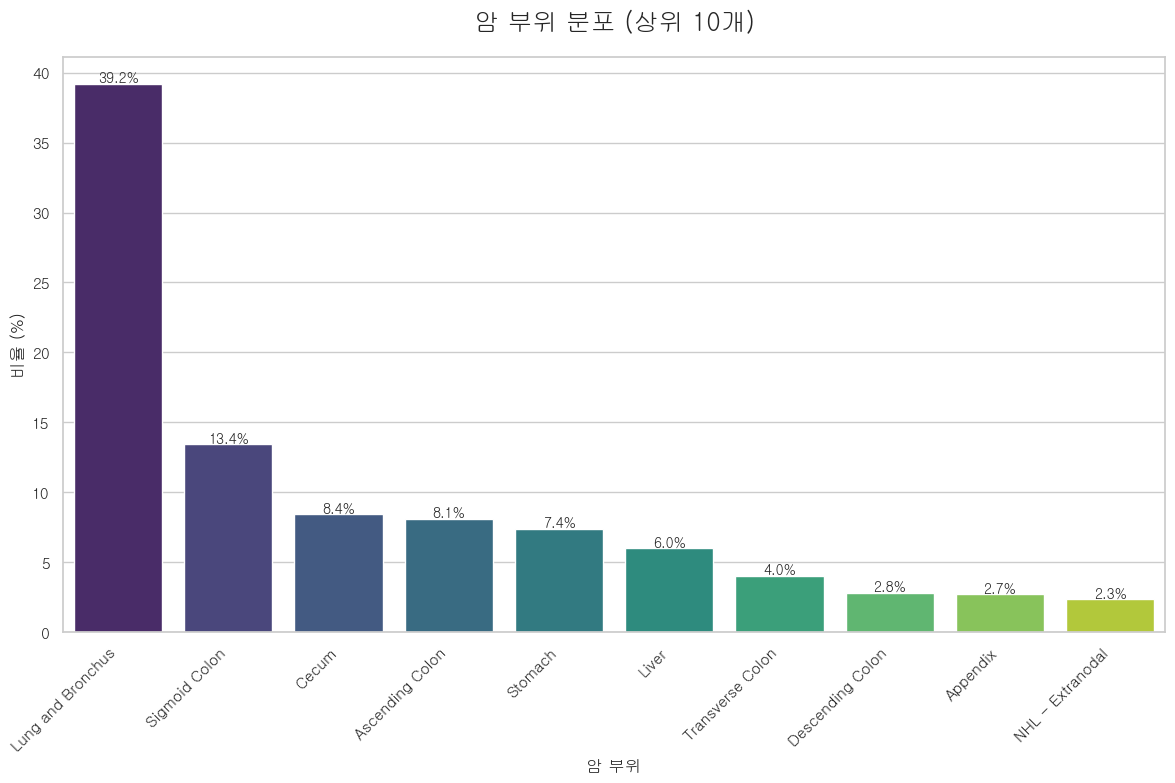

In [156]:
# 분석할 컬럼의 한글명과 실제 컬럼명 매핑
column_mapping = {
    '성별': 'Sex',
    '인종': 'Race recode (W, B, AI, API)',
    '나이': 'Age recode with <1 year olds and 90+',
    '진단 연도': 'Year of diagnosis',
    '암 부위': 'Site recode ICD-O-3/WHO 2008'
}

# 각 컬럼에 대해 반복하며 그래프 생성
for kor_name, eng_name in column_mapping.items():
    if eng_name in df.columns:
        plt.figure(figsize=(12, 8))
        
        # --- 데이터 계산 ---
        if kor_name == '암 부위':
            # '암 부위'는 종류가 많아 상위 10개만 선택합니다.
            value_counts = df[eng_name].value_counts(normalize=True).nlargest(10)
            title = f'{kor_name} 분포 (상위 10개)'
            order = value_counts.index
        else:
            # 그 외 컬럼은 인덱스 순으로 정렬합니다.
            value_counts = df[eng_name].value_counts(normalize=True).sort_index()
            title = f'{kor_name} 분포'
            # .sort_index()는 숫자나 날짜형식의 문자열에 적합합니다.
            order = sorted(value_counts.index.map(str))

        # 비율을 퍼센트로 변환
        data_percent = value_counts * 100
        
        # --- 시각화 (Seaborn 바 그래프) ---
        # x축 데이터를 hue에도 넘겨주고, 불필요한 범례(legend)는 숨깁니다.
        ax = sns.barplot(x=data_percent.index, y=data_percent.values, hue=data_percent.index, order=order, palette='viridis', legend=False)
        
        # --- 그래프 디자인 ---
        plt.title(title, fontsize=18, pad=20)
        plt.xlabel(kor_name, fontsize=12)
        plt.ylabel('비율 (%)', fontsize=12)
        plt.xticks(rotation=45, ha='right', fontsize=11) # x축 라벨 회전
        
        # 막대 위에 비율(%) 텍스트 표시
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.1f}%', ha="center", va='bottom', fontsize=10)

        plt.tight_layout() # 레이아웃 최적화

    else:
        print(f"경고: '{eng_name}' 컬럼을 데이터프레임에서 찾을 수 없습니다.")


### 자살 데이터

In [ ]:
suicide = pd.read_csv('../data/Suicide2010-2021.csv')
suicide

# df_single_case[df_single_case['Vital status recode (study cutoff used)'] == 'Dead'] 60042

,Patient ID,Age recode with <1 year olds and 90+,Sex,Year of diagnosis,Year of follow-up recode,"Race recode (W, B, AI, API)",Site recode ICD-O-3/WHO 2008,Primary Site,Primary Site - labeled,Derived Summary Grade 2018 (2018+),...,COD to site recode,Sequence number,Median household income inflation adj to 2023,Number of Cores Positive Recode (2010+),Number of Cores Examined Recode (2010+),EOD Primary Tumor Recode (2018+),PRCDA 2020,Survival months flag,Survival months,Vital status recode (study cutoff used)
0,8808,60-64 years,Male,2000,2016,White,Prostate,619,C61.9-Prostate gland,Blank(s),...,Suicide and Self-Inflicted Injury,One primary only,"$110,000 - $119,999",Blank(s),Blank(s),Blank(s),Not PRCDA,Complete dates are available and there are mor...,0185,Dead
1,10230,55-59 years,Female,2013,2018,White,Lung and Bronchus,341,"C34.1-Upper lobe, lung",Blank(s),...,Suicide and Self-Inflicted Injury,2nd of 2 or more primaries,"$120,000+",Blank(s),Blank(s),Blank(s),Not PRCDA,Complete dates are available and there are mor...,0053,Dead
2,10230,60-64 years,Female,2016,2018,White,Lung and Bronchus,343,"C34.3-Lower lobe, lung",Blank(s),...,Suicide and Self-Inflicted Injury,3rd of 3 or more primaries,"$120,000+",Blank(s),Blank(s),Blank(s),Not PRCDA,Complete dates are available and there are mor...,0021,Dead
3,107360,60-64 years,Male,2010,2020,White,Melanoma of the Skin,442,C44.2-External ear,Blank(s),...,Suicide and Self-Inflicted Injury,2nd of 2 or more primaries,"$110,000 - $119,999",Blank(s),Blank(s),Blank(s),Not PRCDA,Incomplete dates are available and there canno...,0125,Dead
4,180169,80-84 years,Male,2004,2010,White,Melanoma of the Skin,445,C44.5-Skin of trunk,Blank(s),...,Suicide and Self-Inflicted Injury,2nd of 2 or more primaries,"$100,000 - $109,999",Blank(s),Blank(s),Blank(s),Not PRCDA,Complete dates are available and there are mor...,0066,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8814,63269474,30-34 years,Male,2021,2021,White,Kidney and Renal Pelvis,649,"C64.9-Kidney, NOS",9,...,Suicide and Self-Inflicted Injury,One primary only,"$55,000 - $59,999",Blank(s),Blank(s),100,Not PRCDA,Complete dates are available and there are 0 d...,0000,Dead
8815,63270712,45-49 years,Male,2021,2021,White,Lung and Bronchus,343,"C34.3-Lower lobe, lung",9,...,Suicide and Self-Inflicted Injury,One primary only,"$60,000 - $64,999",Blank(s),Blank(s),500,Not PRCDA,Complete dates are available and there are mor...,0000,Dead
8816,63307996,70-74 years,Male,2020,2020,Asian or Pacific Islander,Other Oral Cavity and Pharynx,140,"C14.0-Pharynx, NOS",9,...,Suicide and Self-Inflicted Injury,One primary only,"$95,000 - $99,999",Blank(s),Blank(s),999,Not PRCDA,Not calculated because a Death Certificate Onl...,Unknown,Dead
8817,63329167,60-64 years,Male,2021,2021,White,Cecum,180,C18.0-Cecum,2,...,Suicide and Self-Inflicted Injury,One primary only,"$50,000 - $54,999",Blank(s),Blank(s),999,Not PRCDA,Complete dates are available and there are mor...,0001,Dead


In [24]:
8819/60042
suicide['Median household income inflation adj to 2023'].value_counts()
suicide['Site recode ICD-O-3/WHO 2008'].value_counts()
# suicide['Site recode ICD-O-3/WHO 2008'].nunique()

Site recode ICD-O-3/WHO 2008
Prostate                                             2106
Lung and Bronchus                                     762
Breast                                                589
Melanoma of the Skin                                  581
Urinary Bladder                                       573
                                                     ... 
Other Acute Leukemia                                    3
Uterus, NOS                                             3
Trachea, Mediastinum and Other Respiratory Organs       2
Vagina                                                  1
Other Myeloid/Monocytic Leukemia                        1
Name: count, Length: 77, dtype: int64

In [25]:
df_single_case['Year of diagnosis'].value_counts()
# df_single_case['Site recode ICD-O-3/WHO 2008'].nunique()

Year of diagnosis
2022    71431
2021    50658
2020    32898
2019    31538
2018    26563
2017    23480
2016    21094
2015    18639
2014    16640
2013    14391
2012    13386
2011    12198
2010    11385
2009    10718
2008     9944
2007     9157
2006     8429
2005     7623
2004     6757
2003     6057
2002     5518
2001     5008
2000     4524
Name: count, dtype: int64